# ÌîºÏ≤ò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù (Correlation Analysis)

## üéØ Î∂ÑÏÑù Î™©Ï†Å
- **ÌîºÏ≤ò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌååÏïÖ**: Ï§ëÎ≥µÏÑ± Î∞è Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÌôïÏù∏
- **Ï†úÍ±∞Îêú ÌîºÏ≤òÎì§ Î∂ÑÏÑù**: history_b_21/23/25Í∞Ä Ï†ïÎßê Ïú†ÏÇ¨Ìïú Ï†ïÎ≥¥Î•º Îã¥Í≥† ÏûàÎäîÏßÄ Í≤ÄÏ¶ù
- **ÏÉÅÌò∏ÏûëÏö© ÌõÑÎ≥¥ Î∞úÍ≤¨**: ÎÇÆÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌîºÏ≤òÎì§ Ï§ë Ï°∞Ìï© Í∞ÄÎä•Ìïú ÌõÑÎ≥¥ ÌÉêÏÉâ
- **ÌîºÏ≤ò ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ**: Ïú†ÏÇ¨Ìïú ÌîºÏ≤òÎì§ÏùÑ Í∑∏Î£πÌôîÌïòÏó¨ ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅ Î∞©Ìñ• Ï†úÏãú

## üìã Î∂ÑÏÑù Ï≤¥ÌÅ¨Î¶¨Ïä§Ìä∏
- [ ] Ï†ÑÏ≤¥ ÌîºÏ≤ò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ
- [ ] Ï†úÍ±∞Îêú ÌîºÏ≤òÎì§(history_b_21/23/25) ÏßëÏ§ë Î∂ÑÏÑù
- [ ] ÌîºÏ≤ò Í∑∏Î£πÎ≥Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (history_a, history_b, feat_*, l_feat_*)
- [ ] ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ(>0.8) ÌîºÏ≤ò Ïåç ÏãùÎ≥Ñ
- [ ] ÌÉÄÍ≤üÍ≥ºÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
- [ ] ÏÉÅÌò∏ÏûëÏö© ÌõÑÎ≥¥ ÌîºÏ≤ò Ï∂îÏ≤ú

---

In [1]:
# ÌôòÍ≤Ω ÏÑ§Ï†ï Î∞è ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
import sys
import os
from pathlib import Path

# ÌîÑÎ°úÏ†ùÌä∏ Î£®Ìä∏ Í≤ΩÎ°ú ÏÑ§Ï†ï
notebook_dir = Path().resolve()
project_root = notebook_dir.parent
src_dir = project_root / 'src'

if str(src_dir) not in sys.path:
    sys.path.insert(0, str(src_dir))
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

print(f"üóÇÔ∏è ÌîÑÎ°úÏ†ùÌä∏ Î£®Ìä∏: {project_root}")
print(f"üóÇÔ∏è ÏÜåÏä§ ÎîîÎ†âÌÜ†Î¶¨: {src_dir}")

# ÌïÑÏàò ÎùºÏù¥Î∏åÎü¨Î¶¨
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# ÏãúÍ∞ÅÌôî ÏÑ§Ï†ï - Î∞ïÏä§ Íπ®Ïßê Î∞©ÏßÄ
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False  # ÎßàÏù¥ÎÑàÏä§ Î∂ÄÌò∏ ÌëúÏãú Î¨∏Ï†ú Ìï¥Í≤∞

# Ìè∞Ìä∏ ÏÑ§Ï†ï - Î∞ïÏä§ Î¨∏Ï†ú Ìï¥Í≤∞ÏùÑ ÏúÑÌï¥ ÏïàÏ†ÑÌïú Ìè∞Ìä∏ ÏÇ¨Ïö©
import matplotlib.font_manager as fm
import platform

# OSÎ≥Ñ ÏïàÏ†ÑÌïú Ìè∞Ìä∏ ÏÑ§Ï†ï
system = platform.system()
if system == "Darwin":  # macOS
    safe_fonts = ['Helvetica', 'Arial', 'DejaVu Sans']
elif system == "Windows":
    safe_fonts = ['Arial', 'Tahoma', 'DejaVu Sans']
else:  # Linux
    safe_fonts = ['DejaVu Sans', 'Liberation Sans', 'Arial']

# ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Ìè∞Ìä∏ Ï∞æÍ∏∞
available_fonts = [f.name for f in fm.fontManager.ttflist]
selected_font = None

for font in safe_fonts:
    if font in available_fonts:
        selected_font = font
        break

if selected_font:
    plt.rcParams['font.family'] = selected_font
    print(f"‚úÖ ÏïàÏ†ÑÌïú Ìè∞Ìä∏ ÏÑ§Ï†ï: {selected_font}")
else:
    plt.rcParams['font.family'] = 'sans-serif'
    print("‚ÑπÔ∏è Í∏∞Î≥∏ sans-serif Ìè∞Ìä∏ ÏÇ¨Ïö©")

# ÌïúÍ∏Ä ÌëúÏãúÍ∞Ä ÌïÑÏöîÌïú Í≤ΩÏö∞ÏóêÎßå ÌïúÍ∏Ä Ìè∞Ìä∏ ÏãúÎèÑ
try_korean_font = False  # ÌïúÍ∏Ä ÌïÑÏöîÏãú TrueÎ°ú Î≥ÄÍ≤Ω
if try_korean_font:
    korean_fonts = [f.name for f in fm.fontManager.ttflist
                   if any(keyword in f.name.lower() for keyword in ['nanum', 'malgun', 'gothic', 'batang'])]
    if korean_fonts:
        plt.rcParams['font.family'] = korean_fonts[0]
        print(f"üá∞üá∑ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï: {korean_fonts[0]}")

# seaborn ÏÑ§Ï†ï
sns.set_palette("husl")
sns.set_context("notebook", font_scale=1.0)

# ÌîÑÎ°úÏ†ùÌä∏ Î™®Îìà
try:
    from data.features import FeatureConfig, prepare_features
    print("‚úÖ Î™®Îìà ÏûÑÌè¨Ìä∏ ÏÑ±Í≥µ")
except ImportError as e:
    print(f"‚ùå Î™®Îìà ÏûÑÌè¨Ìä∏ Ïã§Ìå®: {e}")
    raise

print("üìö ÎùºÏù¥Î∏åÎü¨Î¶¨ Î°úÎî© ÏôÑÎ£å")
print(f"‚è∞ Î∂ÑÏÑù ÏãúÏûë ÏãúÍ∞Ñ: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

üóÇÔ∏è ÌîÑÎ°úÏ†ùÌä∏ Î£®Ìä∏: /Competition/toss-ad-click-prediction
üóÇÔ∏è ÏÜåÏä§ ÎîîÎ†âÌÜ†Î¶¨: /Competition/toss-ad-click-prediction/src
‚úÖ ÏïàÏ†ÑÌïú Ìè∞Ìä∏ ÏÑ§Ï†ï: DejaVu Sans
‚úÖ Î™®Îìà ÏûÑÌè¨Ìä∏ ÏÑ±Í≥µ
üìö ÎùºÏù¥Î∏åÎü¨Î¶¨ Î°úÎî© ÏôÑÎ£å
‚è∞ Î∂ÑÏÑù ÏãúÏûë ÏãúÍ∞Ñ: 2025-09-24 20:05:36


## 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Í∏∞Î≥∏ Ï†ïÎ≥¥

In [2]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
print("üìä Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏãúÏûë")
data_path = Path("../data/processed/train_downsample_1_2.parquet")
df = pl.read_parquet(data_path)

print(f"‚úÖ Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å: {df.shape}")
print(f"üìä ÌÉÄÍ≤ü Î∂ÑÌè¨: {df['clicked'].mean():.6f}")

# ÌîºÏ≤ò Ï§ÄÎπÑ
feature_config = FeatureConfig()
X, y = prepare_features(df, feature_config, has_target=True)

print(f"üéØ ÌîºÏ≤ò Îß§Ìä∏Î¶≠Ïä§: {X.shape}")
print(f"üìù ÌîºÏ≤ò Ïàò: {len(X.columns)}Í∞ú")
print(f"üìä Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ: {X.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

# ÌîºÏ≤ò ÌÉÄÏûÖÎ≥Ñ Î∂ÑÎ•ò
feature_groups = {
    'history_a': [col for col in X.columns if col.startswith('history_a_')],
    'history_b': [col for col in X.columns if col.startswith('history_b_')],
    'feat_a': [col for col in X.columns if col.startswith('feat_a_')],
    'feat_b': [col for col in X.columns if col.startswith('feat_b_')],
    'feat_c': [col for col in X.columns if col.startswith('feat_c_')],
    'feat_d': [col for col in X.columns if col.startswith('feat_d_')],
    'feat_e': [col for col in X.columns if col.startswith('feat_e_')],
    'l_feat': [col for col in X.columns if col.startswith('l_feat_')],
    'seq': [col for col in X.columns if col.startswith('seq_')],
    'others': [col for col in X.columns if not any(col.startswith(prefix) for prefix in 
                                                    ['history_', 'feat_', 'l_feat_', 'seq_'])]
}

print("\nüìã ÌîºÏ≤ò Í∑∏Î£πÎ≥Ñ Í∞úÏàò:")
for group_name, features in feature_groups.items():
    print(f"  {group_name}: {len(features)}Í∞ú")
    if len(features) <= 5:  # Ï†ÅÏùÄ ÌîºÏ≤òÎì§ÏùÄ Ïù¥Î¶ÑÎèÑ Ï∂úÎ†•
        print(f"    ‚Üí {features}")

üìä Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏãúÏûë
‚úÖ Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å: (612537, 119)
üìä ÌÉÄÍ≤ü Î∂ÑÌè¨: 0.333333
üéØ ÌîºÏ≤ò Îß§Ìä∏Î¶≠Ïä§: (612537, 126)
üìù ÌîºÏ≤ò Ïàò: 126Í∞ú
üìä Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ: 588.8 MB

üìã ÌîºÏ≤ò Í∑∏Î£πÎ≥Ñ Í∞úÏàò:
  history_a: 7Í∞ú
  history_b: 30Í∞ú
  feat_a: 18Í∞ú
  feat_b: 6Í∞ú
  feat_c: 8Í∞ú
  feat_d: 6Í∞ú
  feat_e: 11Í∞ú
  l_feat: 27Í∞ú
  seq: 7Í∞ú
  others: 6Í∞ú


## 2. Ï†ÑÏ≤¥ ÌîºÏ≤ò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ

üîÑ Ï†ÑÏ≤¥ ÌîºÏ≤ò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í≥ÑÏÇ∞ Ï§ë...
üìä ÏÉòÌîåÎßÅ: 612537 ‚Üí 100000 Ìñâ
‚úÖ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Îß§Ìä∏Î¶≠Ïä§ Í≥ÑÏÇ∞ ÏôÑÎ£å: (126, 126)


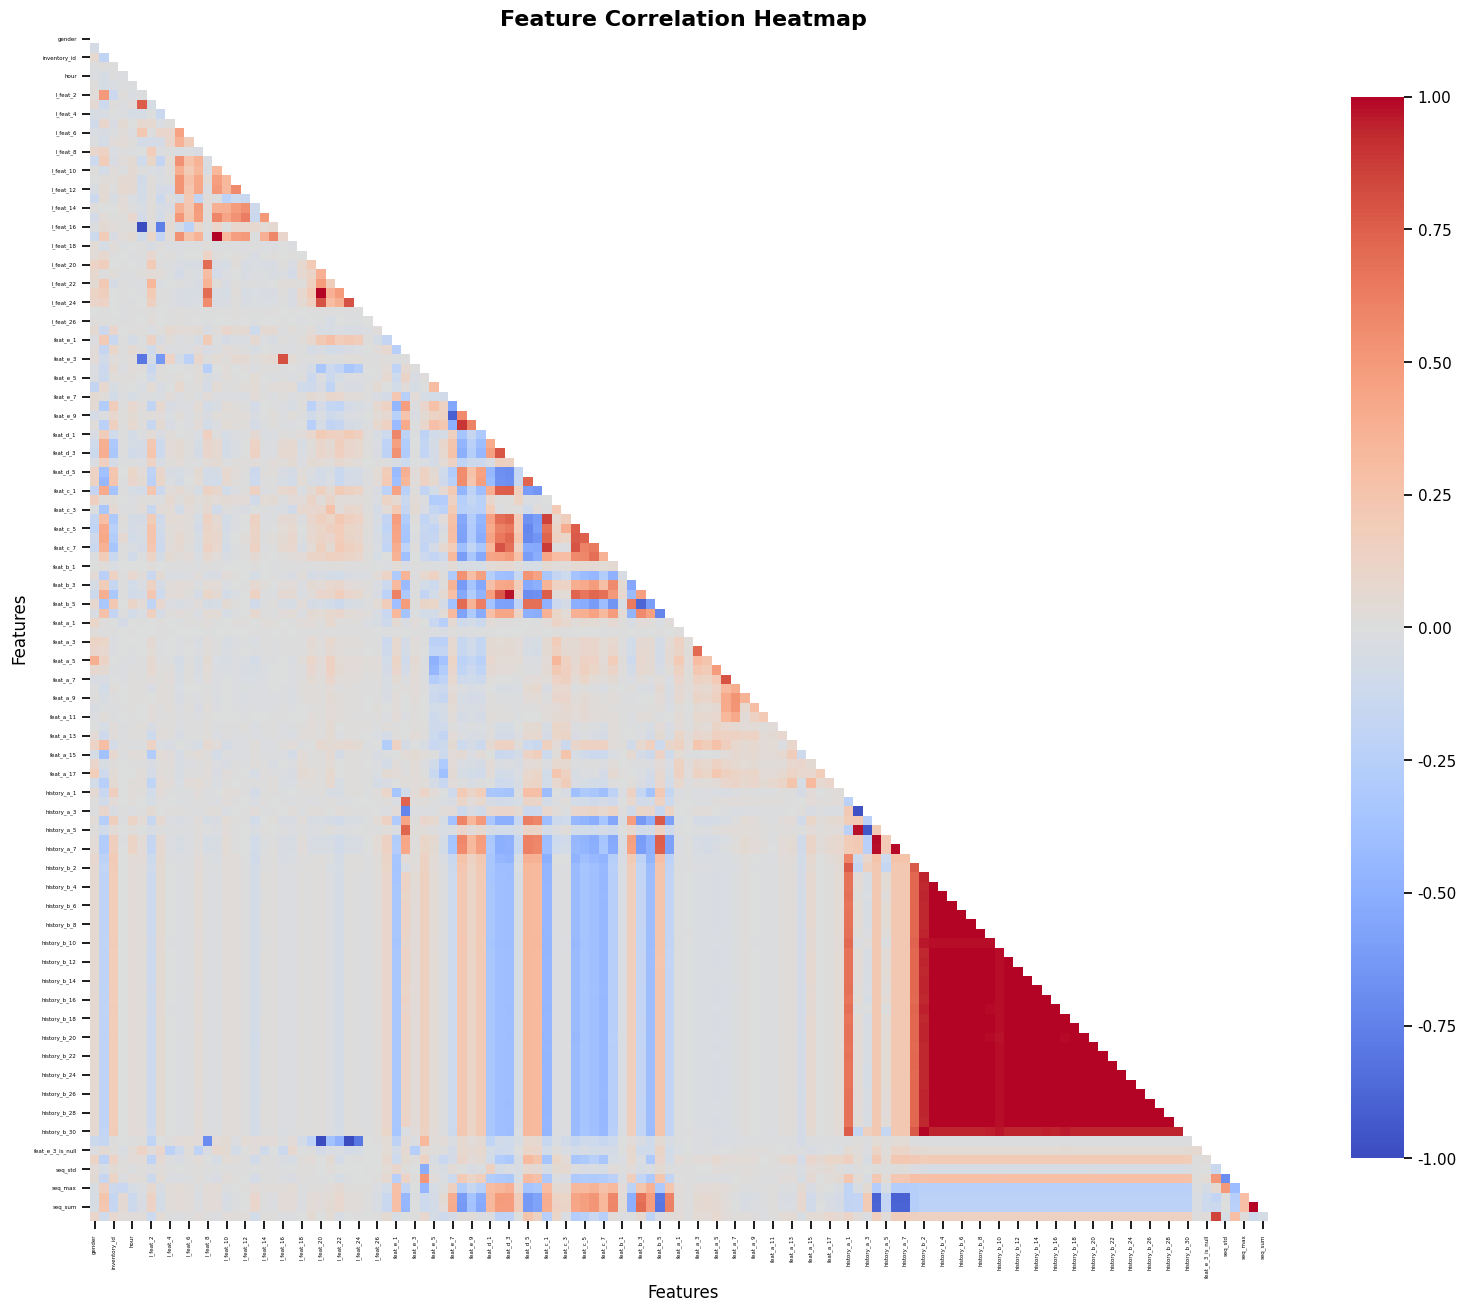

üìä Ï†ÑÏ≤¥ ÌûàÌä∏Îßµ ÏÉùÏÑ± ÏôÑÎ£å


In [3]:
# Ï†ÑÏ≤¥ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í≥ÑÏÇ∞ (ÎÑàÎ¨¥ ÌÅ¥ Ïàò ÏûàÏúºÎãà ÏÉòÌîåÎßÅ)
print("üîÑ Ï†ÑÏ≤¥ ÌîºÏ≤ò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í≥ÑÏÇ∞ Ï§ë...")

# Î©îÎ™®Î¶¨ Ï†àÏïΩÏùÑ ÏúÑÌï¥ ÏÉòÌîåÎßÅ (10Îßå Ìñâ)
if len(X) > 100000:
    sample_idx = np.random.choice(len(X), 100000, replace=False)
    X_sample = X.iloc[sample_idx]
    print(f"üìä ÏÉòÌîåÎßÅ: {len(X)} ‚Üí {len(X_sample)} Ìñâ")
else:
    X_sample = X.copy()

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í≥ÑÏÇ∞
correlation_matrix = X_sample.corr()
print(f"‚úÖ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Îß§Ìä∏Î¶≠Ïä§ Í≥ÑÏÇ∞ ÏôÑÎ£å: {correlation_matrix.shape}")

# Ï†ÑÏ≤¥ ÌûàÌä∏Îßµ (Ï∂ïÏÜå Î≤ÑÏ†Ñ) - Î∞ïÏä§ Íπ®Ïßê Î∞©ÏßÄ
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # ÏÉÅÏÇºÍ∞ÅÌòï ÎßàÏä§ÌÇπ

# Ìè∞Ìä∏ ÌÅ¨Í∏∞ Ï°∞Ï†ïÏúºÎ°ú Î∞ïÏä§ Íπ®Ïßê Î∞©ÏßÄ
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=False, 
            cmap='coolwarm', 
            center=0, 
            square=True,
            cbar_kws={"shrink": .8})

# Ï†úÎ™©Í≥º Î†àÏù¥Î∏îÏùÑ ÏòÅÏñ¥Î°ú Î≥ÄÍ≤Ω (Î∞ïÏä§ Íπ®Ïßê Î∞©ÏßÄ)
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

# tick ÌÅ¨Í∏∞Î•º Îçî ÏûëÍ≤å Ï°∞Ï†ï
plt.xticks(rotation=90, fontsize=4)
plt.yticks(rotation=0, fontsize=4)
plt.tight_layout()
plt.show()

print("üìä Ï†ÑÏ≤¥ ÌûàÌä∏Îßµ ÏÉùÏÑ± ÏôÑÎ£å")

## 3. ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌîºÏ≤ò Ïåç Î∂ÑÏÑù

In [4]:
# ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌîºÏ≤ò Ïåç Ï∞æÍ∏∞
print("üîç ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌîºÏ≤ò Ïåç Î∂ÑÏÑù")
print("=" * 50)

def find_high_correlations(corr_matrix, threshold=0.7, exclude_self=True):
    """ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌîºÏ≤ò ÏåçÏùÑ Ï∞æÎäî Ìï®Ïàò"""
    high_corr_pairs = []
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i if exclude_self else 0, len(corr_matrix.columns)):
            if exclude_self and i == j:
                continue
                
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) >= threshold:
                high_corr_pairs.append({
                    'feature1': corr_matrix.columns[i],
                    'feature2': corr_matrix.columns[j],
                    'correlation': corr_val
                })
    
    if high_corr_pairs:
        return pd.DataFrame(high_corr_pairs).sort_values('correlation', key=abs, ascending=False)
    else:
        return pd.DataFrame(columns=['feature1', 'feature2', 'correlation'])

# ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌîºÏ≤òÎì§ (0.7 Ïù¥ÏÉÅ)
high_corr_df = find_high_correlations(correlation_matrix, threshold=0.7)

print(f"üìä ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌîºÏ≤ò Ïåç (|r| >= 0.7): {len(high_corr_df)}Í∞ú")
if not high_corr_df.empty:
    print("\nÏÉÅÏúÑ 20Í∞ú ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ:")
    print(high_corr_df.head(20).to_string(index=False, float_format='%.4f'))
else:
    print("ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (>= 0.7) ÌîºÏ≤ò ÏåçÏù¥ ÏóÜÏäµÎãàÎã§.")

# Ï§ëÍ∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎèÑ ÌôïÏù∏ (0.5-0.7)
medium_corr_df = find_high_correlations(correlation_matrix, threshold=0.5)
medium_corr_df = medium_corr_df[medium_corr_df['correlation'].abs() < 0.7]

print(f"\nüìä Ï§ëÍ∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌîºÏ≤ò Ïåç (0.5 <= |r| < 0.7): {len(medium_corr_df)}Í∞ú")
if not medium_corr_df.empty:
    print("ÏÉÅÏúÑ 15Í∞ú Ï§ëÍ∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ:")
    print(medium_corr_df.head(15).to_string(index=False, float_format='%.4f'))

üîç ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌîºÏ≤ò Ïåç Î∂ÑÏÑù
üìä ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌîºÏ≤ò Ïåç (|r| >= 0.7): 503Í∞ú

ÏÉÅÏúÑ 20Í∞ú ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ:
    feature1        feature2  correlation
    l_feat_9       l_feat_17       1.0000
   l_feat_20       l_feat_23       1.0000
    l_feat_1       l_feat_16      -1.0000
   l_feat_23 row_nulls_ge_95      -1.0000
   l_feat_20 row_nulls_ge_95      -1.0000
history_b_16    history_b_21       1.0000
history_b_18    history_b_21       1.0000
history_b_16    history_b_18       1.0000
history_b_21    history_b_24       1.0000
history_b_16    history_b_24       1.0000
history_b_18    history_b_24       1.0000
history_b_21    history_b_23       1.0000
history_b_16    history_b_23       1.0000
history_b_18    history_b_23       1.0000
history_b_21    history_b_25       1.0000
history_b_16    history_b_25       1.0000
history_b_18    history_b_25       1.0000
history_b_23    history_b_24       1.0000
 history_b_6    history_b_21       1.0000
 history_b_6    history_b

## 4. Ï†úÍ±∞Îêú ÌîºÏ≤òÎì§ ÏßëÏ§ë Î∂ÑÏÑù (history_b_21/23/25)

üéØ Ï†úÍ±∞Îêú ÌîºÏ≤òÎì§(history_b_21/23/25) ÏßëÏ§ë Î∂ÑÏÑù
üìã Î∂ÑÏÑù ÎåÄÏÉÅ ÌîºÏ≤ò: ['history_b_21', 'history_b_23', 'history_b_25']


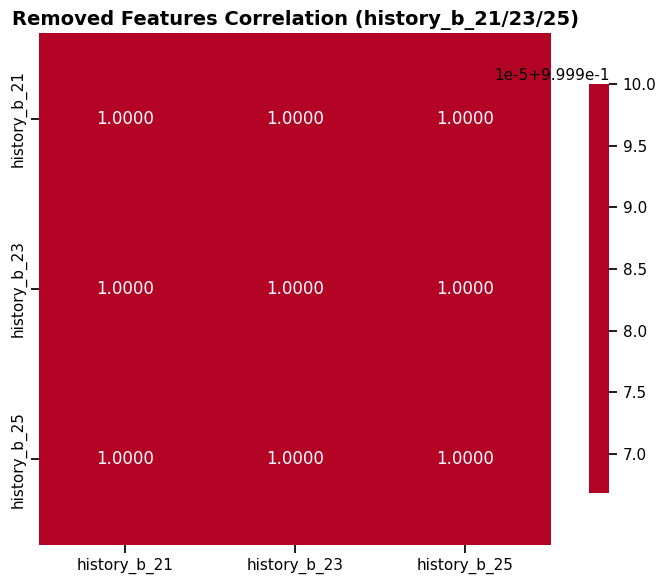


üìä Ï†úÍ±∞Îêú ÌîºÏ≤òÎì§ Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ:
  history_b_21 ‚Üî history_b_23: 1.0000
  history_b_21 ‚Üî history_b_25: 1.0000
  history_b_23 ‚Üî history_b_25: 1.0000

üìä Îã§Î•∏ history_b ÌîºÏ≤òÎì§Í≥ºÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (ÏÉÅÏúÑ 10Í∞ú):

  history_b_21ÏôÄ Í∞ÄÏû• ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ:
    history_b_16: 1.0000
    history_b_18: 1.0000
    history_b_24: 1.0000
    history_b_6: 1.0000
    history_b_29: 1.0000

  history_b_23ÏôÄ Í∞ÄÏû• ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ:
    history_b_16: 1.0000
    history_b_18: 1.0000
    history_b_24: 1.0000
    history_b_6: 1.0000
    history_b_29: 1.0000

  history_b_25ÏôÄ Í∞ÄÏû• ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ:
    history_b_16: 1.0000
    history_b_18: 1.0000
    history_b_24: 1.0000
    history_b_6: 1.0000
    history_b_29: 1.0000


In [5]:
# Ï†úÍ±∞Îêú ÌîºÏ≤òÎì§Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
print("üéØ Ï†úÍ±∞Îêú ÌîºÏ≤òÎì§(history_b_21/23/25) ÏßëÏ§ë Î∂ÑÏÑù")
print("=" * 60)

removed_features = ['history_b_21', 'history_b_23', 'history_b_25']
available_removed = [f for f in removed_features if f in X.columns]

print(f"üìã Î∂ÑÏÑù ÎåÄÏÉÅ ÌîºÏ≤ò: {available_removed}")

if len(available_removed) >= 2:
    # Ï†úÍ±∞Îêú ÌîºÏ≤òÎì§ÎÅºÎ¶¨Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
    removed_corr = X_sample[available_removed].corr()
    
    # ÌûàÌä∏Îßµ ÏÉùÏÑ± - Î∞ïÏä§ Íπ®Ïßê Î∞©ÏßÄ
    plt.figure(figsize=(8, 6))
    sns.heatmap(removed_corr, 
                annot=True, 
                cmap='coolwarm', 
                center=0, 
                square=True,
                cbar_kws={"shrink": .8},
                fmt='.4f')
    
    # ÏòÅÏñ¥ Ï†úÎ™©ÏúºÎ°ú Î≥ÄÍ≤Ω
    plt.title('Removed Features Correlation (history_b_21/23/25)', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # ÏàòÏπòÏ†Å Î∂ÑÏÑù
    print("\nüìä Ï†úÍ±∞Îêú ÌîºÏ≤òÎì§ Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ:")
    for i in range(len(available_removed)):
        for j in range(i+1, len(available_removed)):
            feat1, feat2 = available_removed[i], available_removed[j]
            corr_val = removed_corr.loc[feat1, feat2]
            print(f"  {feat1} ‚Üî {feat2}: {corr_val:.4f}")
    
    # Îã§Î•∏ history_b ÌîºÏ≤òÎì§Í≥ºÏùò Í¥ÄÍ≥Ñ
    other_history_b = [f for f in feature_groups['history_b'] if f not in available_removed]
    if other_history_b:
        print(f"\nüìä Îã§Î•∏ history_b ÌîºÏ≤òÎì§Í≥ºÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (ÏÉÅÏúÑ 10Í∞ú):")
        
        for removed_feat in available_removed:
            correlations = []
            for other_feat in other_history_b:
                if other_feat in correlation_matrix.columns and removed_feat in correlation_matrix.columns:
                    corr_val = correlation_matrix.loc[removed_feat, other_feat]
                    correlations.append((other_feat, corr_val))
            
            # Ï†àÎåìÍ∞í Í∏∞Ï§Ä Ï†ïÎ†¨
            correlations.sort(key=lambda x: abs(x[1]), reverse=True)
            
            print(f"\n  {removed_feat}ÏôÄ Í∞ÄÏû• ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ:")
            for feat, corr in correlations[:5]:
                print(f"    {feat}: {corr:.4f}")
else:
    print("‚ùå Ï†úÍ±∞Îêú ÌîºÏ≤òÎì§Ïù¥ Îç∞Ïù¥ÌÑ∞Ïóê ÏóÜÏäµÎãàÎã§.")

## 5. ÌîºÏ≤ò Í∑∏Î£πÎ≥Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù

üìä ÌîºÏ≤ò Í∑∏Î£πÎ≥Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù

üîç HISTORY_A Í∑∏Î£π ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (7Í∞ú ÌîºÏ≤ò)


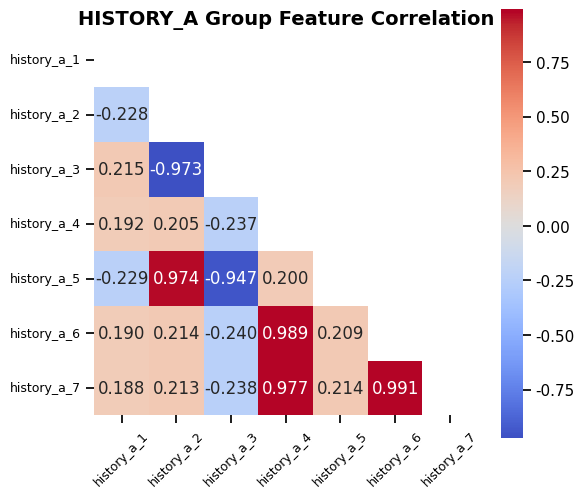

üìã history_a Í∑∏Î£π ÎÇ¥ ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (|r| >= 0.6):
   feature1    feature2  correlation
history_a_6 history_a_7       0.9906
history_a_4 history_a_6       0.9892
history_a_4 history_a_7       0.9769
history_a_2 history_a_5       0.9736
history_a_2 history_a_3      -0.9732
history_a_3 history_a_5      -0.9473

üîç HISTORY_B Í∑∏Î£π ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (30Í∞ú ÌîºÏ≤ò)


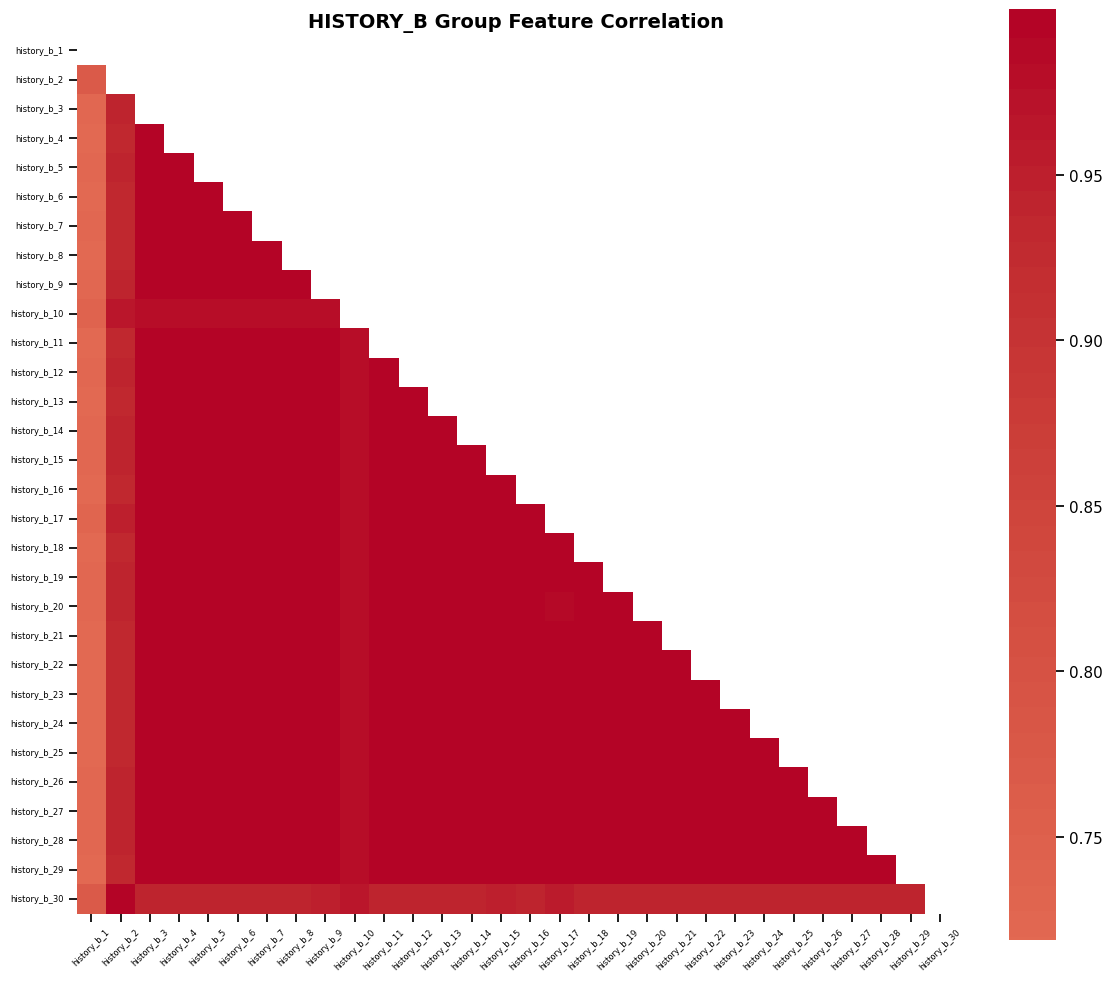

üìã history_b Í∑∏Î£π ÎÇ¥ ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (|r| >= 0.6):
    feature1     feature2  correlation
history_b_16 history_b_21       1.0000
history_b_18 history_b_21       1.0000
history_b_16 history_b_18       1.0000
history_b_21 history_b_24       1.0000
history_b_16 history_b_24       1.0000
history_b_18 history_b_24       1.0000
history_b_21 history_b_23       1.0000
history_b_16 history_b_23       1.0000
history_b_18 history_b_23       1.0000
history_b_21 history_b_25       1.0000

üîç FEAT_A Í∑∏Î£π ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (18Í∞ú ÌîºÏ≤ò)


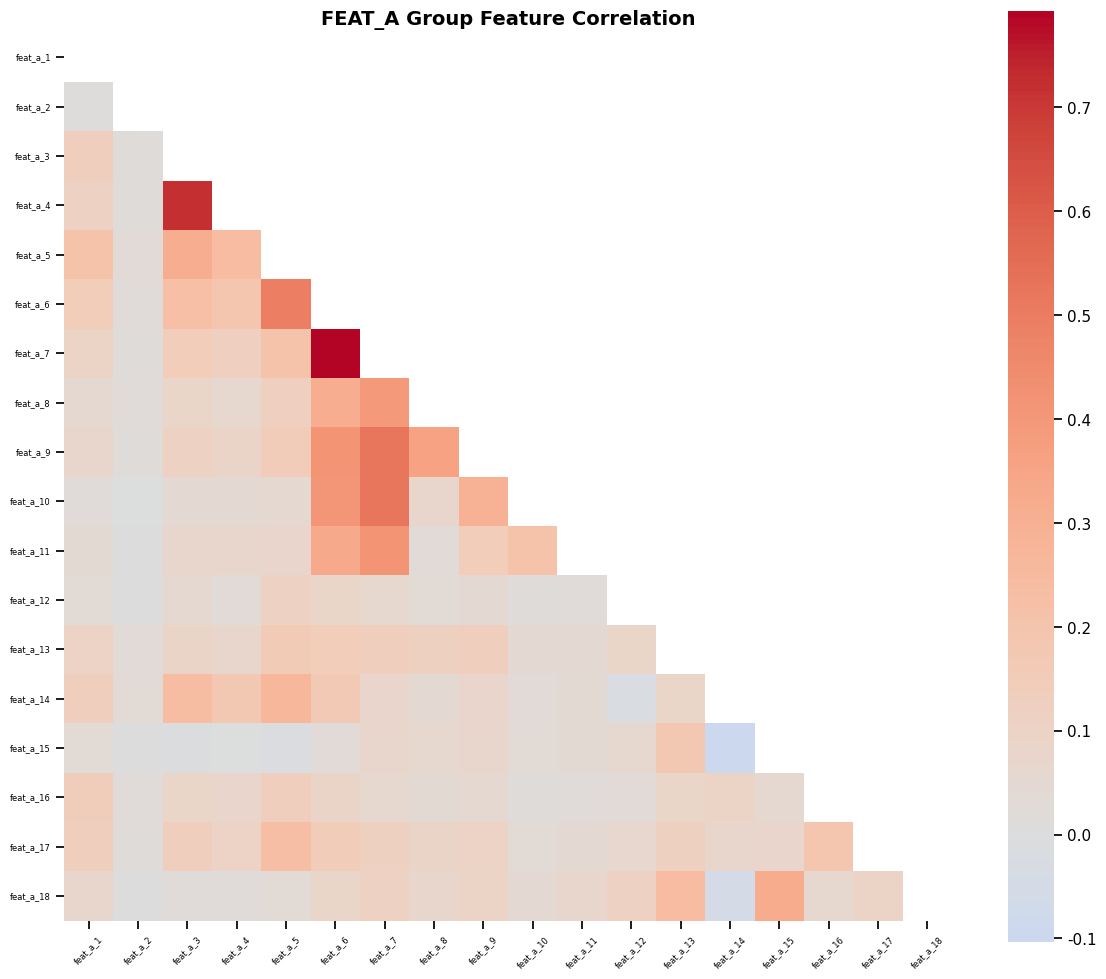

üìã feat_a Í∑∏Î£π ÎÇ¥ ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (|r| >= 0.6):
feature1 feature2  correlation
feat_a_6 feat_a_7       0.7929
feat_a_3 feat_a_4       0.7160

üîç FEAT_B Í∑∏Î£π ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (6Í∞ú ÌîºÏ≤ò)


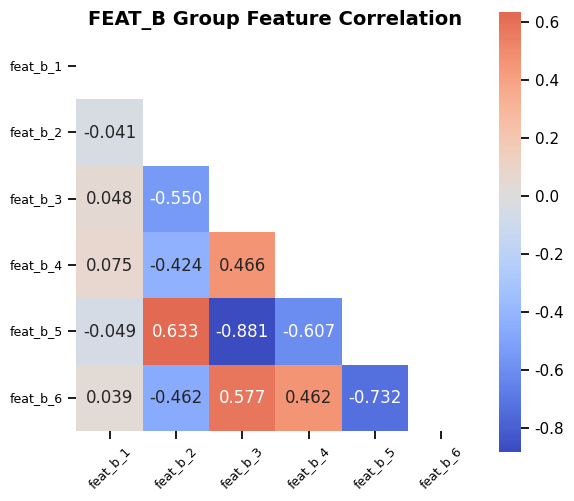

üìã feat_b Í∑∏Î£π ÎÇ¥ ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (|r| >= 0.6):
feature1 feature2  correlation
feat_b_3 feat_b_5      -0.8811
feat_b_5 feat_b_6      -0.7320
feat_b_2 feat_b_5       0.6329
feat_b_4 feat_b_5      -0.6072

üîç FEAT_C Í∑∏Î£π ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (8Í∞ú ÌîºÏ≤ò)


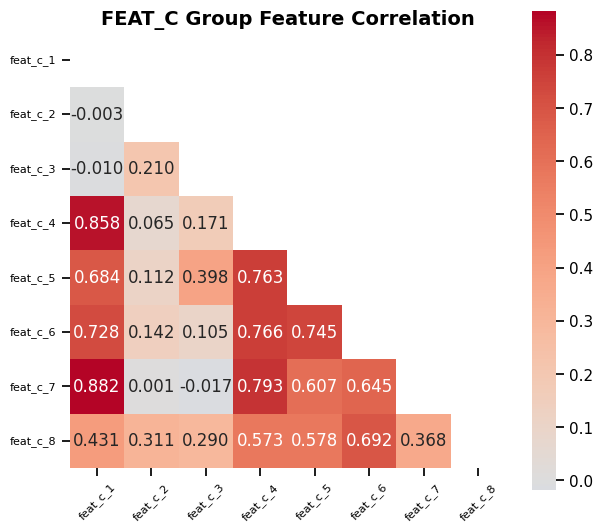

üìã feat_c Í∑∏Î£π ÎÇ¥ ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (|r| >= 0.6):
feature1 feature2  correlation
feat_c_1 feat_c_7       0.8818
feat_c_1 feat_c_4       0.8578
feat_c_4 feat_c_7       0.7925
feat_c_4 feat_c_6       0.7665
feat_c_4 feat_c_5       0.7634
feat_c_5 feat_c_6       0.7451
feat_c_1 feat_c_6       0.7280
feat_c_6 feat_c_8       0.6916
feat_c_1 feat_c_5       0.6840
feat_c_6 feat_c_7       0.6448

üîç FEAT_D Í∑∏Î£π ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (6Í∞ú ÌîºÏ≤ò)


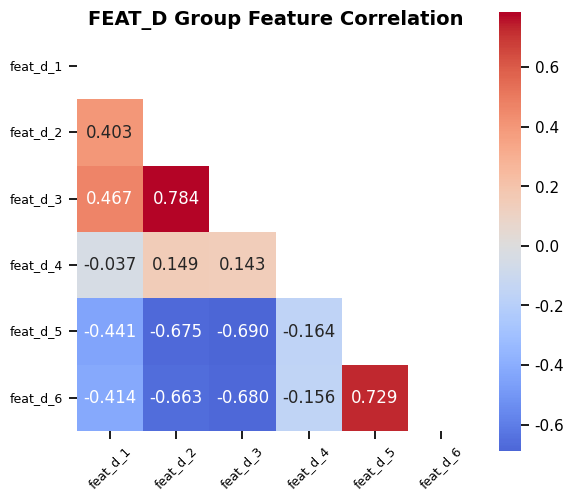

üìã feat_d Í∑∏Î£π ÎÇ¥ ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (|r| >= 0.6):
feature1 feature2  correlation
feat_d_2 feat_d_3       0.7837
feat_d_5 feat_d_6       0.7293
feat_d_3 feat_d_5      -0.6901
feat_d_3 feat_d_6      -0.6799
feat_d_2 feat_d_5      -0.6754
feat_d_2 feat_d_6      -0.6631

üîç FEAT_E Í∑∏Î£π ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (11Í∞ú ÌîºÏ≤ò)


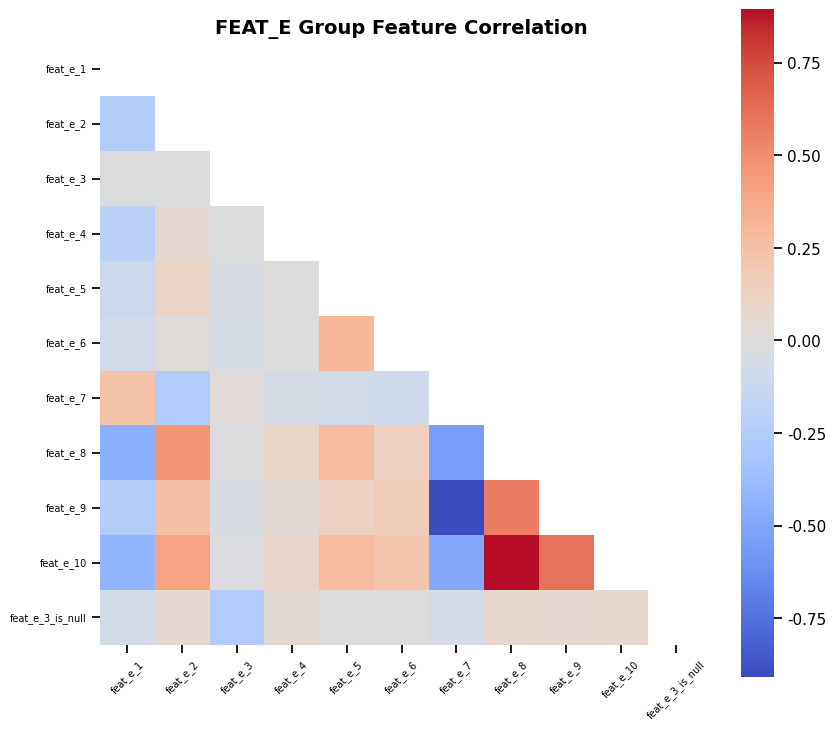

üìã feat_e Í∑∏Î£π ÎÇ¥ ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (|r| >= 0.6):
feature1  feature2  correlation
feat_e_7  feat_e_9      -0.9093
feat_e_8 feat_e_10       0.8942
feat_e_9 feat_e_10       0.6079

üîç L_FEAT Í∑∏Î£π ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (27Í∞ú ÌîºÏ≤ò)


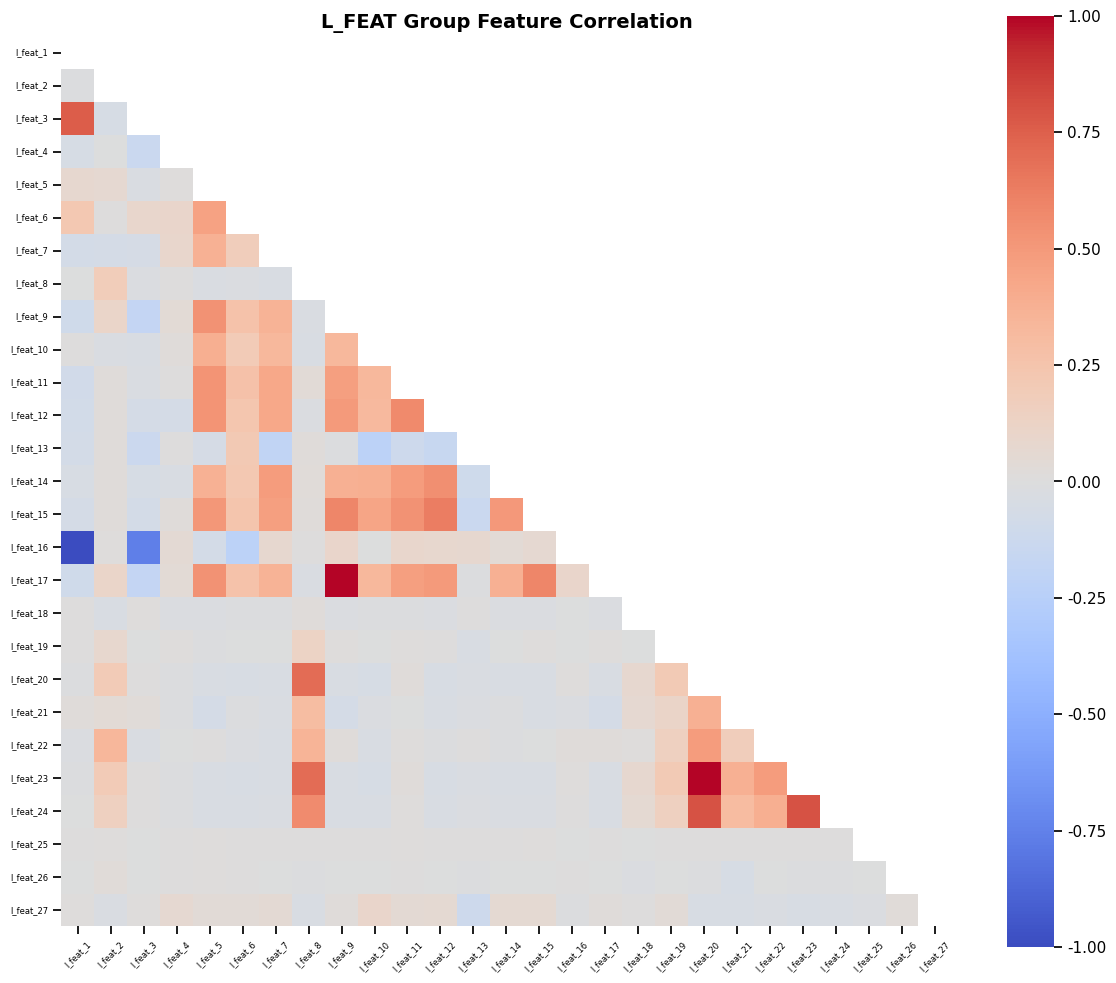

üìã l_feat Í∑∏Î£π ÎÇ¥ ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (|r| >= 0.6):
 feature1  feature2  correlation
 l_feat_1 l_feat_16      -1.0000
 l_feat_9 l_feat_17       1.0000
l_feat_20 l_feat_23       1.0000
l_feat_20 l_feat_24       0.8039
l_feat_23 l_feat_24       0.8039
 l_feat_1  l_feat_3       0.7619
 l_feat_3 l_feat_16      -0.7619
 l_feat_8 l_feat_20       0.7031
 l_feat_8 l_feat_23       0.7031
l_feat_12 l_feat_15       0.6305

üîç SEQ Í∑∏Î£π ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (7Í∞ú ÌîºÏ≤ò)


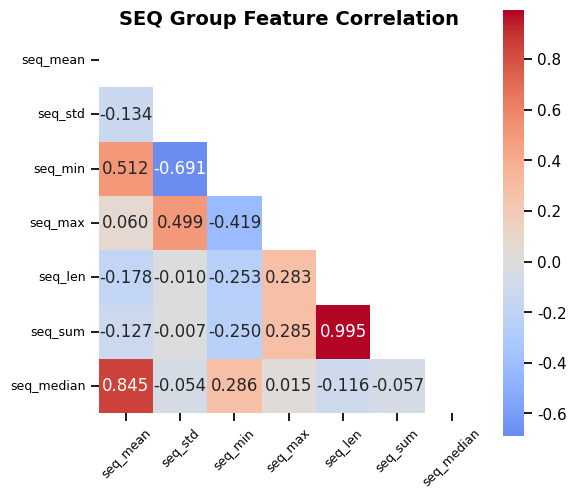

üìã seq Í∑∏Î£π ÎÇ¥ ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (|r| >= 0.6):
feature1   feature2  correlation
 seq_len    seq_sum       0.9948
seq_mean seq_median       0.8452
 seq_std    seq_min      -0.6909

üîç OTHERS Í∑∏Î£π ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (6Í∞ú ÌîºÏ≤ò)


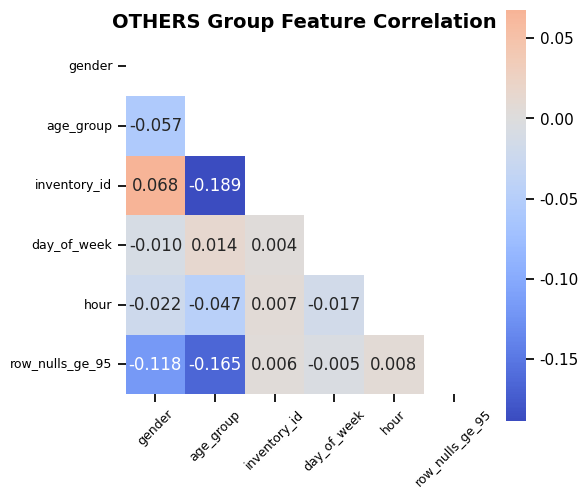

üìã others Í∑∏Î£π ÎÇ¥ ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌîºÏ≤ò Ïåç ÏóÜÏùå


In [6]:
# ÌîºÏ≤ò Í∑∏Î£πÎ≥Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ
print("üìä ÌîºÏ≤ò Í∑∏Î£πÎ≥Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù")
print("=" * 50)

# Í∞Å Í∑∏Î£πÎ≥ÑÎ°ú ÌûàÌä∏Îßµ ÏÉùÏÑ±
for group_name, features in feature_groups.items():
    if len(features) < 2:  # ÌîºÏ≤òÍ∞Ä 1Í∞ú Ïù¥ÌïòÎ©¥ Í±¥ÎÑàÎõ∞Í∏∞
        continue
    
    available_features = [f for f in features if f in X_sample.columns]
    if len(available_features) < 2:
        continue
    
    print(f"\nüîç {group_name.upper()} Í∑∏Î£π ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ({len(available_features)}Í∞ú ÌîºÏ≤ò)")
    
    # Í∑∏Î£π ÎÇ¥ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í≥ÑÏÇ∞
    group_corr = X_sample[available_features].corr()
    
    # ÌûàÌä∏Îßµ ÌÅ¨Í∏∞ Ï°∞Ï†ï
    fig_size = max(6, min(12, len(available_features) * 0.8))
    
    plt.figure(figsize=(fig_size, fig_size))
    mask = np.triu(np.ones_like(group_corr, dtype=bool))  # ÏÉÅÏÇºÍ∞ÅÌòï ÎßàÏä§ÌÇπ
    
    sns.heatmap(group_corr, 
                mask=mask,
                annot=True if len(available_features) <= 10 else False,
                cmap='coolwarm', 
                center=0, 
                square=True,
                cbar_kws={"shrink": .8},
                fmt='.3f')
    
    # ÏòÅÏñ¥ Ï†úÎ™©ÏúºÎ°ú Î≥ÄÍ≤Ω (Î∞ïÏä§ Íπ®Ïßê Î∞©ÏßÄ)
    plt.title(f'{group_name.upper()} Group Feature Correlation', fontsize=14, fontweight='bold')
    
    # Ìè∞Ìä∏ ÌÅ¨Í∏∞ Ï°∞Ï†ï
    plt.xticks(rotation=45, fontsize=max(6, 12-len(available_features)//2))
    plt.yticks(rotation=0, fontsize=max(6, 12-len(available_features)//2))
    plt.tight_layout()
    plt.show()
    
    # Í∑∏Î£π ÎÇ¥ ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌîºÏ≤ò Ïåç
    group_high_corr = find_high_correlations(group_corr, threshold=0.6)
    if not group_high_corr.empty:
        print(f"üìã {group_name} Í∑∏Î£π ÎÇ¥ ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (|r| >= 0.6):")
        print(group_high_corr.head(10).to_string(index=False, float_format='%.4f'))
    else:
        print(f"üìã {group_name} Í∑∏Î£π ÎÇ¥ ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌîºÏ≤ò Ïåç ÏóÜÏùå")

## 6. ÌÉÄÍ≤üÍ≥ºÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù

üéØ ÌÉÄÍ≤ü(clicked)Í≥ºÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
üìä ÌÉÄÍ≤üÍ≥º ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÄ ÏÉÅÏúÑ 20Í∞ú ÌîºÏ≤ò:
     feature  correlation
inventory_id     0.177041
    feat_b_4    -0.154665
    feat_d_3    -0.149314
 history_a_1     0.144836
 history_b_2     0.137308
history_b_30     0.134887
    feat_d_2    -0.132418
 history_b_1     0.131309
    feat_e_1    -0.130925
history_b_10     0.117328
    feat_c_1    -0.117218
history_b_17     0.106900
    feat_d_5     0.106620
    feat_c_7    -0.105912
history_b_20     0.104889
history_b_15     0.104844
 history_b_9     0.104578
 history_b_3     0.104300
history_b_27     0.103198
history_b_28     0.102593

üìä ÌÉÄÍ≤üÍ≥º ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÇÆÏùÄ ÌïòÏúÑ 20Í∞ú ÌîºÏ≤ò:
         feature  correlation
        feat_a_9    -0.005955
       feat_a_10    -0.005315
        feat_a_4    -0.005167
        feat_a_2    -0.005133
        feat_a_6    -0.004890
       l_feat_18     0.004669
       age_group     0.004616
       l_feat_24    -0.004562
        feat_e_6  

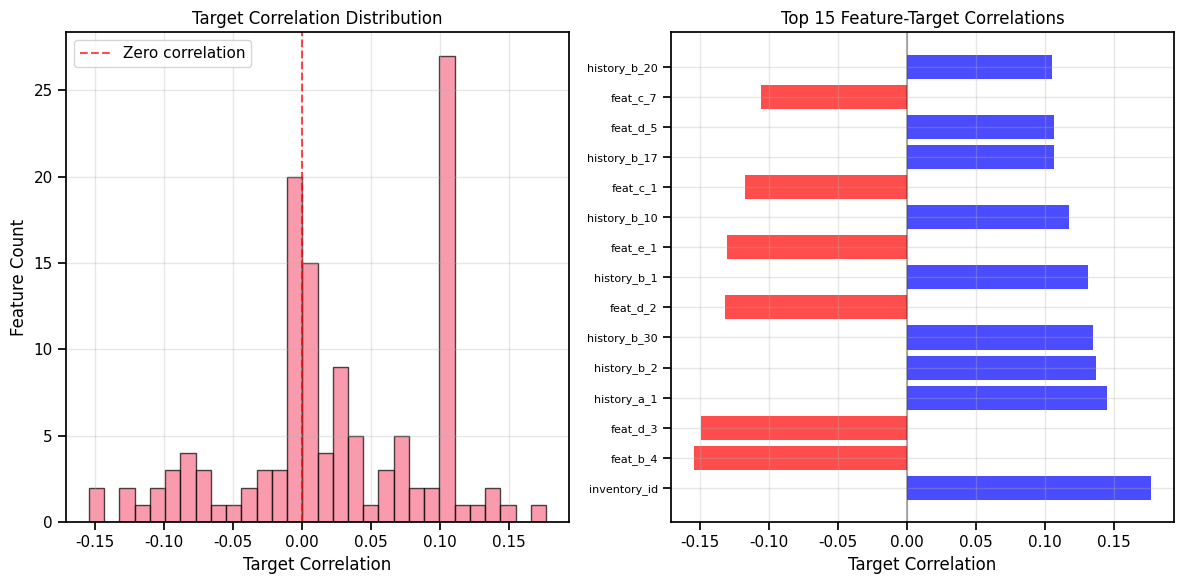


üéØ Ï†úÍ±∞Îêú ÌîºÏ≤òÎì§Ïùò ÌÉÄÍ≤ü ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ:
     feature  correlation
history_b_25     0.101393
history_b_23     0.101383
history_b_21     0.101315


In [7]:
# ÌÉÄÍ≤üÍ≥ºÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
print("üéØ ÌÉÄÍ≤ü(clicked)Í≥ºÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù")
print("=" * 50)

# ÌÉÄÍ≤üÍ≥º ÌîºÏ≤òÎì§Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í≥ÑÏÇ∞
if isinstance(y, pd.Series):
    y_sample = y.iloc[X_sample.index] if len(X) > 100000 else y
else:
    y_sample = pd.Series(y)
    if len(X) > 100000:
        y_sample = y_sample.iloc[sample_idx]

target_correlations = []
for col in X_sample.columns:
    corr_val = X_sample[col].corr(y_sample)
    target_correlations.append({'feature': col, 'correlation': corr_val})

target_corr_df = pd.DataFrame(target_correlations).sort_values('correlation', key=abs, ascending=False)

print("üìä ÌÉÄÍ≤üÍ≥º ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÄ ÏÉÅÏúÑ 20Í∞ú ÌîºÏ≤ò:")
print(target_corr_df.head(20).to_string(index=False, float_format='%.6f'))

print("\nüìä ÌÉÄÍ≤üÍ≥º ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÇÆÏùÄ ÌïòÏúÑ 20Í∞ú ÌîºÏ≤ò:")
print(target_corr_df.tail(20).to_string(index=False, float_format='%.6f'))

# ÌÉÄÍ≤ü ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÏä§ÌÜ†Í∑∏Îû® - Î∞ïÏä§ Íπ®Ïßê Î∞©ÏßÄ
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(target_corr_df['correlation'], bins=30, alpha=0.7, edgecolor='black')
plt.axvline(0, color='red', linestyle='--', alpha=0.7, label='Zero correlation')
plt.xlabel('Target Correlation')
plt.ylabel('Feature Count')
plt.title('Target Correlation Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# ÏÉÅÏúÑ 15Í∞ú ÌîºÏ≤òÎßå Î∞îÏ∞®Ìä∏Î°ú
top_features = target_corr_df.head(15)
colors = ['red' if corr < 0 else 'blue' for corr in top_features['correlation']]
y_pos = range(len(top_features))
plt.barh(y_pos, top_features['correlation'], color=colors, alpha=0.7)
plt.yticks(y_pos, top_features['feature'], fontsize=8)
plt.xlabel('Target Correlation')
plt.title('Top 15 Feature-Target Correlations')
plt.axvline(0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Ï†úÍ±∞Îêú ÌîºÏ≤òÎì§Ïùò ÌÉÄÍ≤ü ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌôïÏù∏
print("\nüéØ Ï†úÍ±∞Îêú ÌîºÏ≤òÎì§Ïùò ÌÉÄÍ≤ü ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ:")
removed_target_corr = target_corr_df[target_corr_df['feature'].isin(removed_features)]
if not removed_target_corr.empty:
    print(removed_target_corr.to_string(index=False, float_format='%.6f'))
else:
    print("Ï†úÍ±∞Îêú ÌîºÏ≤òÎì§Ïù¥ Îç∞Ïù¥ÌÑ∞Ïóê ÏóÜÏäµÎãàÎã§.")

## 7. ÏÉÅÌò∏ÏûëÏö© ÌõÑÎ≥¥ ÌîºÏ≤ò Ï∂îÏ≤ú

In [8]:
# ÏÉÅÌò∏ÏûëÏö© ÌõÑÎ≥¥ ÌîºÏ≤ò Ï∂îÏ≤ú
print("üí° ÏÉÅÌò∏ÏûëÏö© ÌîºÏ≤ò ÌõÑÎ≥¥ Ï∂îÏ≤ú")
print("=" * 50)

# 1. ÌÉÄÍ≤üÍ≥º ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÏßÄÎßå ÏÑúÎ°úÎäî ÎÇÆÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÏù∏ ÌîºÏ≤ò Ïåç
high_target_corr_features = target_corr_df[target_corr_df['correlation'].abs() > 0.01]['feature'].tolist()[:20]

print(f"üìä ÌÉÄÍ≤üÍ≥º ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌîºÏ≤ò {len(high_target_corr_features)}Í∞ú Ï§ëÏóêÏÑú ÏÉÅÌò∏ÏûëÏö© ÌõÑÎ≥¥ ÌÉêÏÉâ...")

interaction_candidates = []
for i, feat1 in enumerate(high_target_corr_features):
    for feat2 in high_target_corr_features[i+1:]:
        if feat1 in correlation_matrix.columns and feat2 in correlation_matrix.columns:
            # Îëê ÌîºÏ≤ò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÇÆÏúºÎ©¥ÏÑú (< 0.3) Îëò Îã§ ÌÉÄÍ≤üÍ≥º ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎäî Í≤ΩÏö∞
            feat_corr = abs(correlation_matrix.loc[feat1, feat2])
            feat1_target_corr = abs(target_corr_df[target_corr_df['feature'] == feat1]['correlation'].iloc[0])
            feat2_target_corr = abs(target_corr_df[target_corr_df['feature'] == feat2]['correlation'].iloc[0])
            
            if feat_corr < 0.3 and feat1_target_corr > 0.005 and feat2_target_corr > 0.005:
                interaction_candidates.append({
                    'feature1': feat1,
                    'feature2': feat2,
                    'feature_correlation': feat_corr,
                    'feat1_target_corr': feat1_target_corr,
                    'feat2_target_corr': feat2_target_corr,
                    'interaction_score': (feat1_target_corr + feat2_target_corr) * (1 - feat_corr)
                })

interaction_df = pd.DataFrame(interaction_candidates).sort_values('interaction_score', ascending=False)

print(f"\nüéØ ÏÉÅÌò∏ÏûëÏö© ÌõÑÎ≥¥ ÌîºÏ≤ò Ïåç: {len(interaction_df)}Í∞ú")
if not interaction_df.empty:
    print("\nÏÉÅÏúÑ 15Í∞ú ÏÉÅÌò∏ÏûëÏö© ÌõÑÎ≥¥:")
    print(interaction_df.head(15).to_string(index=False, float_format='%.4f'))
    
    # ÌäπÎ≥Ñ Ï∂îÏ≤ú: Îã§Î•∏ Í∑∏Î£π Í∞Ñ Ï°∞Ìï©
    print("\nüåü ÌäπÎ≥Ñ Ï∂îÏ≤ú - Îã§Î•∏ ÌîºÏ≤ò Í∑∏Î£π Í∞Ñ Ï°∞Ìï©:")
    cross_group_interactions = []
    
    for _, row in interaction_df.head(20).iterrows():
        feat1, feat2 = row['feature1'], row['feature2']
        
        # ÌîºÏ≤ò Í∑∏Î£π ÌôïÏù∏
        feat1_group = 'unknown'
        feat2_group = 'unknown'
        
        for group_name, features in feature_groups.items():
            if feat1 in features:
                feat1_group = group_name
            if feat2 in features:
                feat2_group = group_name
        
        if feat1_group != feat2_group and feat1_group != 'unknown' and feat2_group != 'unknown':
            cross_group_interactions.append({
                'feature1': feat1,
                'group1': feat1_group,
                'feature2': feat2,
                'group2': feat2_group,
                'interaction_score': row['interaction_score']
            })
    
    if cross_group_interactions:
        cross_group_df = pd.DataFrame(cross_group_interactions).head(10)
        print(cross_group_df.to_string(index=False, float_format='%.4f'))
    else:
        print("Îã§Î•∏ Í∑∏Î£π Í∞Ñ ÏÉÅÌò∏ÏûëÏö© ÌõÑÎ≥¥Í∞Ä ÏóÜÏäµÎãàÎã§.")
else:
    print("ÏÉÅÌò∏ÏûëÏö© ÌõÑÎ≥¥Î•º Ï∞æÏßÄ Î™ªÌñàÏäµÎãàÎã§.")

# 2. Ï†ÑÌÜµÏ†ÅÏù∏ Ï∂îÏ≤ú Ï°∞Ìï©
print("\nüìã Ï†ÑÌÜµÏ†ÅÏù∏ Ï∂îÏ≤ú ÏÉÅÌò∏ÏûëÏö© Ï°∞Ìï©:")
traditional_combinations = [
    ('history_a_1', 'inventory_id', 'ÏÇ¨Ïö©Ïûê ÌñâÎèô √ó Í¥ëÍ≥† Ïù∏Î≤§ÌÜ†Î¶¨'),
    ('age_group', 'day_of_week', 'Ïó∞Î†πÎåÄ √ó ÏöîÏùº Ìå®ÌÑ¥'),
    ('history_a_1', 'hour', 'ÏÇ¨Ïö©Ïûê ÌñâÎèô √ó ÏãúÍ∞ÑÎåÄ'),
    ('feat_e_3', 'history_a_3', 'ÌîºÏ≤ò E √ó ÏÇ¨Ïö©Ïûê ÌûàÏä§ÌÜ†Î¶¨'),
]

for feat1, feat2, description in traditional_combinations:
    if feat1 in X.columns and feat2 in X.columns:
        if feat1 in correlation_matrix.columns and feat2 in correlation_matrix.columns:
            corr_val = correlation_matrix.loc[feat1, feat2]
            feat1_target = target_corr_df[target_corr_df['feature'] == feat1]['correlation'].iloc[0]
            feat2_target = target_corr_df[target_corr_df['feature'] == feat2]['correlation'].iloc[0]
            
            print(f"  {feat1} √ó {feat2}: {description}")
            print(f"    ÌîºÏ≤òÍ∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ: {corr_val:.4f}")
            print(f"    ÌÉÄÍ≤ü ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ: {feat1_target:.4f}, {feat2_target:.4f}")
        else:
            print(f"  {feat1} √ó {feat2}: {description} (ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Îç∞Ïù¥ÌÑ∞ ÏóÜÏùå)")
    else:
        missing = [f for f in [feat1, feat2] if f not in X.columns]
        print(f"  {feat1} √ó {feat2}: {description} (ÎàÑÎùΩ ÌîºÏ≤ò: {missing})")

üí° ÏÉÅÌò∏ÏûëÏö© ÌîºÏ≤ò ÌõÑÎ≥¥ Ï∂îÏ≤ú
üìä ÌÉÄÍ≤üÍ≥º ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌîºÏ≤ò 20Í∞ú Ï§ëÏóêÏÑú ÏÉÅÌò∏ÏûëÏö© ÌõÑÎ≥¥ ÌÉêÏÉâ...

üéØ ÏÉÅÌò∏ÏûëÏö© ÌõÑÎ≥¥ ÌîºÏ≤ò Ïåç: 15Í∞ú

ÏÉÅÏúÑ 15Í∞ú ÏÉÅÌò∏ÏûëÏö© ÌõÑÎ≥¥:
    feature1     feature2  feature_correlation  feat1_target_corr  feat2_target_corr  interaction_score
inventory_id  history_a_1               0.1664             0.1770             0.1448             0.2683
inventory_id     feat_e_1               0.1444             0.1770             0.1309             0.2635
inventory_id  history_b_2               0.1881             0.1770             0.1373             0.2552
inventory_id history_b_30               0.1889             0.1770             0.1349             0.2530
inventory_id  history_b_1               0.2101             0.1770             0.1313             0.2436
inventory_id history_b_10               0.1897             0.1770             0.1173             0.2385
inventory_id history_b_17               0.1876             0.1770 

## 8. Î∂ÑÏÑù ÏöîÏïΩ Î∞è Í∂åÏû•ÏÇ¨Ìï≠

In [9]:
# Î∂ÑÏÑù ÏöîÏïΩ
print("üìã ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù ÏöîÏïΩ Î∞è Í∂åÏû•ÏÇ¨Ìï≠")
print("=" * 60)

# ÏöîÏïΩ ÌÜµÍ≥Ñ
total_features = len(X.columns)
high_corr_pairs = len(find_high_correlations(correlation_matrix, threshold=0.7))
medium_corr_pairs = len(find_high_correlations(correlation_matrix, threshold=0.5)) - high_corr_pairs
avg_target_corr = target_corr_df['correlation'].abs().mean()
max_target_corr = target_corr_df['correlation'].abs().max()

print(f"üìä Î∂ÑÏÑù ÏöîÏïΩ:")
print(f"  Ï¥ù ÌîºÏ≤ò Ïàò: {total_features}Í∞ú")
print(f"  ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ïåç (|r| >= 0.7): {high_corr_pairs}Í∞ú")
print(f"  Ï§ëÍ∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ïåç (0.5 <= |r| < 0.7): {medium_corr_pairs}Í∞ú")
print(f"  ÌÉÄÍ≤üÍ≥º ÌèâÍ∑† ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ: {avg_target_corr:.6f}")
print(f"  ÌÉÄÍ≤üÍ≥º ÏµúÎåÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ: {max_target_corr:.6f}")

# Ï†úÍ±∞Îêú ÌîºÏ≤òÎì§Ïóê ÎåÄÌïú Í≤ÄÏ¶ù
print(f"\nüéØ Ï†úÍ±∞Îêú ÌîºÏ≤òÎì§(history_b_21/23/25) Í≤ÄÏ¶ù:")
removed_in_data = [f for f in removed_features if f in X.columns]
if removed_in_data:
    removed_corr_with_target = target_corr_df[target_corr_df['feature'].isin(removed_in_data)]
    avg_removed_target_corr = removed_corr_with_target['correlation'].abs().mean()
    
    print(f"  Ï†úÍ±∞Îêú ÌîºÏ≤òÎì§Ïùò ÌèâÍ∑† ÌÉÄÍ≤ü ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ: {avg_removed_target_corr:.6f}")
    if avg_removed_target_corr < avg_target_corr:
        print("  ‚úÖ Ï†úÍ±∞Í∞Ä ÌÉÄÎãπÌï®: ÌèâÍ∑†Î≥¥Îã§ ÎÇÆÏùÄ ÌÉÄÍ≤ü ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ")
    else:
        print("  ‚ö†Ô∏è  Ï†úÍ±∞ Ïû¨Í≤ÄÌÜ† ÌïÑÏöî: ÌèâÍ∑†Î≥¥Îã§ ÎÜíÏùÄ ÌÉÄÍ≤ü ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ")
        
    # Ï†úÍ±∞Îêú ÌîºÏ≤òÎì§ Í∞ÑÏùò Ïú†ÏÇ¨ÏÑ± ÌôïÏù∏
    if len(removed_in_data) >= 2:
        removed_internal_corr = X_sample[removed_in_data].corr()
        avg_internal_corr = removed_internal_corr.values[np.triu_indices_from(removed_internal_corr.values, k=1)].mean()
        print(f"  Ï†úÍ±∞Îêú ÌîºÏ≤òÎì§ Í∞Ñ ÌèâÍ∑† ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ: {avg_internal_corr:.4f}")
        
        if avg_internal_corr > 0.7:
            print("  ‚úÖ Ï†úÍ±∞Í∞Ä ÌÉÄÎãπÌï®: ÎÜíÏùÄ ÎÇ¥Î∂Ä ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (Ï§ëÎ≥µÏÑ±)")
        elif avg_internal_corr > 0.3:
            print("  ‚û°Ô∏è  Î≥¥ÌÜµ ÏàòÏ§ÄÏùò ÎÇ¥Î∂Ä ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ")
        else:
            print("  ‚ö†Ô∏è  ÎÇÆÏùÄ ÎÇ¥Î∂Ä ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ: Îã§Î•∏ Ï†ïÎ≥¥Î•º Îã¥Í≥† ÏûàÏùÑ Í∞ÄÎä•ÏÑ±")

# Îã§Ïùå Îã®Í≥Ñ Í∂åÏû•ÏÇ¨Ìï≠
print(f"\nüí° Îã§Ïùå Îã®Í≥Ñ Í∂åÏû•ÏÇ¨Ìï≠:")
print(f"  1. üöÄ OptimizedFeatureConfigV1 Ï†ÅÏö© ÌõÑ LB Í≤ÄÏ¶ù Ïö∞ÏÑ† ÏßÑÌñâ")

if not interaction_df.empty:
    top_interaction = interaction_df.iloc[0]
    print(f"  2. üéØ ÏÉÅÌò∏ÏûëÏö© ÌîºÏ≤ò Ïã§Ìóò: {top_interaction['feature1']} √ó {top_interaction['feature2']}")
    print(f"     (ÏÉÅÌò∏ÏûëÏö© Ïä§ÏΩîÏñ¥: {top_interaction['interaction_score']:.4f})")

if high_corr_pairs > 0:
    print(f"  3. üîÑ ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌîºÏ≤ò Ïåç {high_corr_pairs}Í∞ú Ï∂îÍ∞Ä Ï†úÍ±∞ Í≤ÄÌÜ†")
    print(f"     (Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Î¨∏Ï†ú Ìï¥Í≤∞)")

print(f"  4. üìä ÏßëÍ≥Ñ ÌîºÏ≤ò ÏÉùÏÑ±: inventory_idÎ≥Ñ, ÏãúÍ∞ÑÎåÄÎ≥Ñ CTR ÌÜµÍ≥Ñ")
print(f"  5. üß™ ÌÉÄÍ≤ü ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÏÉÅÏúÑ ÌîºÏ≤òÎì§ Ï°∞Ìï©ÏúºÎ°ú ÏÉàÎ°úÏö¥ ÌååÏÉù Î≥ÄÏàò ÏÉùÏÑ±")

print(f"\n‚è∞ Î∂ÑÏÑù ÏôÑÎ£å ÏãúÍ∞Ñ: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("‚úÖ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù ÏôÑÎ£å!")

üìã ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù ÏöîÏïΩ Î∞è Í∂åÏû•ÏÇ¨Ìï≠
üìä Î∂ÑÏÑù ÏöîÏïΩ:
  Ï¥ù ÌîºÏ≤ò Ïàò: 126Í∞ú
  ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ïåç (|r| >= 0.7): 503Í∞ú
  Ï§ëÍ∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ïåç (0.5 <= |r| < 0.7): 156Í∞ú
  ÌÉÄÍ≤üÍ≥º ÌèâÍ∑† ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ: 0.057790
  ÌÉÄÍ≤üÍ≥º ÏµúÎåÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ: 0.177041

üéØ Ï†úÍ±∞Îêú ÌîºÏ≤òÎì§(history_b_21/23/25) Í≤ÄÏ¶ù:
  Ï†úÍ±∞Îêú ÌîºÏ≤òÎì§Ïùò ÌèâÍ∑† ÌÉÄÍ≤ü ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ: 0.101364
  ‚ö†Ô∏è  Ï†úÍ±∞ Ïû¨Í≤ÄÌÜ† ÌïÑÏöî: ÌèâÍ∑†Î≥¥Îã§ ÎÜíÏùÄ ÌÉÄÍ≤ü ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
  Ï†úÍ±∞Îêú ÌîºÏ≤òÎì§ Í∞Ñ ÌèâÍ∑† ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ: 1.0000
  ‚úÖ Ï†úÍ±∞Í∞Ä ÌÉÄÎãπÌï®: ÎÜíÏùÄ ÎÇ¥Î∂Ä ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (Ï§ëÎ≥µÏÑ±)

üí° Îã§Ïùå Îã®Í≥Ñ Í∂åÏû•ÏÇ¨Ìï≠:
  1. üöÄ OptimizedFeatureConfigV1 Ï†ÅÏö© ÌõÑ LB Í≤ÄÏ¶ù Ïö∞ÏÑ† ÏßÑÌñâ
  2. üéØ ÏÉÅÌò∏ÏûëÏö© ÌîºÏ≤ò Ïã§Ìóò: inventory_id √ó history_a_1
     (ÏÉÅÌò∏ÏûëÏö© Ïä§ÏΩîÏñ¥: 0.2683)
  3. üîÑ ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌîºÏ≤ò Ïåç 503Í∞ú Ï∂îÍ∞Ä Ï†úÍ±∞ Í≤ÄÌÜ†
     (Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Î¨∏Ï†ú Ìï¥Í≤∞)
  4. üìä ÏßëÍ≥Ñ ÌîºÏ≤ò ÏÉùÏÑ±: inventory_idÎ≥Ñ, ÏãúÍ∞ÑÎåÄÎ≥Ñ CTR ÌÜµÍ≥Ñ
  5. üß™ ÌÉÄÍ≤ü ÏÉÅÍ¥ÄÍ

In [10]:
# history_b ÌîºÏ≤òÎì§Ïùò ÌÉÄÍ≤ü ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
import pandas as pd
import numpy as np
import polars as pl
from pathlib import Path

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
data_path = Path("/Competition/toss-ad-click-prediction/data/processed/train_downsample_1_2.parquet")
df = pl.read_parquet(data_path)

# ÌîºÏ≤ò Ï§ÄÎπÑ
from data.features import FeatureConfig, prepare_features
feature_config = FeatureConfig()
X, y = prepare_features(df, feature_config, has_target=True)

# history_b ÌîºÏ≤òÎì§Îßå Ï∂îÏ∂ú
history_b_features = [col for col in X.columns if col.startswith('history_b_')]
print(f"üìä Ï†ÑÏ≤¥ history_b ÌîºÏ≤ò Ïàò: {len(history_b_features)}Í∞ú")
print(f"ÌîºÏ≤ò Î™©Î°ù: {sorted(history_b_features)}")

# ÏÉòÌîåÎßÅ
sample_size = min(50000, len(X))
sample_idx = np.random.choice(len(X), sample_size, replace=False)
X_sample = X.iloc[sample_idx]
y_sample = pd.Series(y).iloc[sample_idx]

# ÌÉÄÍ≤üÍ≥ºÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í≥ÑÏÇ∞
history_b_correlations = []
for col in history_b_features:
    if col in X_sample.columns:
        corr_val = X_sample[col].corr(y_sample)
        history_b_correlations.append({
            'feature': col, 
            'correlation': corr_val,
            'abs_correlation': abs(corr_val)
        })

# DataFrameÏúºÎ°ú Î≥ÄÌôòÌïòÍ≥† Ï†àÎåìÍ∞í Í∏∞Ï§Ä Ï†ïÎ†¨
history_b_corr_df = pd.DataFrame(history_b_correlations).sort_values('abs_correlation', ascending=False)

print(f"\nüéØ history_b ÌîºÏ≤òÎì§Ïùò ÌÉÄÍ≤ü ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (Ï†àÎåìÍ∞í Í∏∞Ï§Ä ÎÇ¥Î¶ºÏ∞®Ïàú):")
print(history_b_corr_df.to_string(index=False, float_format='%.6f'))

print(f"\nüìà ÏÉÅÏúÑ 10Í∞ú (ÎÇ®Í∏∏ ÌõÑÎ≥¥):")
top_10 = history_b_corr_df.head(10)
for _, row in top_10.iterrows():
    print(f"  {row['feature']}: {row['correlation']:.6f} (|{row['abs_correlation']:.6f}|)")

print(f"\nüìâ ÌïòÏúÑ 10Í∞ú (Ï†úÍ±∞ ÌõÑÎ≥¥):")
bottom_10 = history_b_corr_df.tail(10)
for _, row in bottom_10.iterrows():
    print(f"  {row['feature']}: {row['correlation']:.6f} (|{row['abs_correlation']:.6f}|)")

üìä Ï†ÑÏ≤¥ history_b ÌîºÏ≤ò Ïàò: 30Í∞ú
ÌîºÏ≤ò Î™©Î°ù: ['history_b_1', 'history_b_10', 'history_b_11', 'history_b_12', 'history_b_13', 'history_b_14', 'history_b_15', 'history_b_16', 'history_b_17', 'history_b_18', 'history_b_19', 'history_b_2', 'history_b_20', 'history_b_21', 'history_b_22', 'history_b_23', 'history_b_24', 'history_b_25', 'history_b_26', 'history_b_27', 'history_b_28', 'history_b_29', 'history_b_3', 'history_b_30', 'history_b_4', 'history_b_5', 'history_b_6', 'history_b_7', 'history_b_8', 'history_b_9']

üéØ history_b ÌîºÏ≤òÎì§Ïùò ÌÉÄÍ≤ü ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (Ï†àÎåìÍ∞í Í∏∞Ï§Ä ÎÇ¥Î¶ºÏ∞®Ïàú):
     feature  correlation  abs_correlation
 history_b_2     0.140496         0.140496
history_b_30     0.137880         0.137880
 history_b_1     0.132555         0.132555
history_b_10     0.119961         0.119961
history_b_17     0.111287         0.111287
history_b_15     0.108059         0.108059
 history_b_9     0.107641         0.107641
 history_b_3     0.107436         0.107436
hist

In [11]:
# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í∏∞Ï§ÄÏúºÎ°ú Ï†úÍ±∞ Ï†ÑÎûµ ÏàòÎ¶Ω
print("üéØ history_b ÌîºÏ≤ò Ï†úÍ±∞ Ï†ÑÎûµ Î∂ÑÏÑù")
print("=" * 60)

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÌè¨ Î∂ÑÏÑù
correlations = history_b_corr_df['abs_correlation'].values
print(f"üìä ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌÜµÍ≥Ñ:")
print(f"  ÌèâÍ∑†: {np.mean(correlations):.6f}")
print(f"  Ï§ëÏúÑÏàò: {np.median(correlations):.6f}")
print(f"  ÌëúÏ§ÄÌé∏Ï∞®: {np.std(correlations):.6f}")
print(f"  ÏµúÎåÄÍ∞í: {np.max(correlations):.6f}")
print(f"  ÏµúÏÜåÍ∞í: {np.min(correlations):.6f}")

# ÏûÑÍ≥ÑÍ∞í Í∏∞Î∞ò Î∂ÑÎ•ò
high_threshold = 0.11  # ÏÉÅÏúÑ Í∑∏Î£π
low_threshold = 0.105  # ÌïòÏúÑ Í∑∏Î£π

high_corr_features = history_b_corr_df[history_b_corr_df['abs_correlation'] >= high_threshold]
medium_corr_features = history_b_corr_df[
    (history_b_corr_df['abs_correlation'] >= low_threshold) & 
    (history_b_corr_df['abs_correlation'] < high_threshold)
]
low_corr_features = history_b_corr_df[history_b_corr_df['abs_correlation'] < low_threshold]

print(f"\nüìà Î∂ÑÎ•ò Í≤∞Í≥º:")
print(f"üü¢ ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (>= {high_threshold}): {len(high_corr_features)}Í∞ú")
for _, row in high_corr_features.iterrows():
    print(f"    {row['feature']}: {row['correlation']:.6f}")

print(f"\nüü° Ï§ëÍ∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ({low_threshold} - {high_threshold}): {len(medium_corr_features)}Í∞ú") 
for _, row in medium_corr_features.iterrows():
    print(f"    {row['feature']}: {row['correlation']:.6f}")

print(f"\nüî¥ ÎÇÆÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (< {low_threshold}): {len(low_corr_features)}Í∞ú")
for _, row in low_corr_features.iterrows():
    print(f"    {row['feature']}: {row['correlation']:.6f}")

# Ï†úÍ±∞ Í∂åÏû•ÏÇ¨Ìï≠
print(f"\nüí° Ï†úÍ±∞ Í∂åÏû•ÏÇ¨Ìï≠:")
print(f"‚úÖ Ïú†ÏßÄ Í∂åÏû• (ÏÉÅÏúÑ 5-7Í∞ú): {high_corr_features['feature'].tolist()}")
print(f"‚ö†Ô∏è Ï°∞Í±¥Î∂Ä Ï†úÍ±∞ (ÏÑ±Îä• ÌÖåÏä§Ìä∏ ÌïÑÏöî): {medium_corr_features['feature'].tolist()}")
print(f"‚ùå Ï†úÍ±∞ Í∂åÏû• (ÌïòÏúÑ 10Í∞ú): {low_corr_features['feature'].tolist()}")

# Í∏∞Ï°¥ OptimizedFeatureConfigÏôÄ ÎπÑÍµê
existing_removed = ['history_b_21', 'history_b_23', 'history_b_25']
print(f"\nüîç Í∏∞Ï°¥ Ï†úÍ±∞ ÌîºÏ≤òÏôÄ ÎπÑÍµê:")
print(f"Í∏∞Ï°¥ Ï†úÍ±∞: {existing_removed}")
for feat in existing_removed:
    if feat in history_b_corr_df['feature'].values:
        corr_val = history_b_corr_df[history_b_corr_df['feature'] == feat]['correlation'].iloc[0]
        abs_corr = abs(corr_val)
        rank = history_b_corr_df[history_b_corr_df['feature'] == feat].index[0] + 1
        print(f"  {feat}: {corr_val:.6f} (ÏàúÏúÑ: {rank}/{len(history_b_features)})")

print(f"\n‚úÖ Í∏∞Ï°¥ Ï†úÍ±∞ Í≤∞Ï†ïÏù¥ Ìï©Î¶¨Ï†Å: Î™®Îëê ÌïòÏúÑ 10Í∞úÏóê Ìè¨Ìï®")

üéØ history_b ÌîºÏ≤ò Ï†úÍ±∞ Ï†ÑÎûµ Î∂ÑÏÑù
üìä ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌÜµÍ≥Ñ:
  ÌèâÍ∑†: 0.109039
  Ï§ëÏúÑÏàò: 0.104655
  ÌëúÏ§ÄÌé∏Ï∞®: 0.009855
  ÏµúÎåÄÍ∞í: 0.140496
  ÏµúÏÜåÍ∞í: 0.104080

üìà Î∂ÑÎ•ò Í≤∞Í≥º:
üü¢ ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (>= 0.11): 5Í∞ú
    history_b_2: 0.140496
    history_b_30: 0.137880
    history_b_1: 0.132555
    history_b_10: 0.119961
    history_b_17: 0.111287

üü° Ï§ëÍ∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (0.105 - 0.11): 9Í∞ú
    history_b_15: 0.108059
    history_b_9: 0.107641
    history_b_3: 0.107436
    history_b_20: 0.107281
    history_b_27: 0.106206
    history_b_28: 0.106034
    history_b_5: 0.105975
    history_b_26: 0.105540
    history_b_12: 0.105463

üî¥ ÎÇÆÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (< 0.105): 16Í∞ú
    history_b_4: 0.104667
    history_b_22: 0.104644
    history_b_19: 0.104614
    history_b_14: 0.104605
    history_b_7: 0.104515
    history_b_8: 0.104456
    history_b_13: 0.104441
    history_b_11: 0.104399
    history_b_29: 0.104187
    history_b_25: 0.104159
    history_b_6: 0.104158
   

In [12]:
# Îçî Í≥µÍ≤©Ï†ÅÏù∏ Ï†úÍ±∞ Ï†ÑÎûµ Ï†úÏïà
print("üéØ History_b Í≥µÍ≤©Ï†Å Ï†úÍ±∞ Ï†ÑÎûµ")
print("=" * 50)

# Top 5Îßå ÎÇ®Í∏∞Í≥† ÎÇòÎ®∏ÏßÄ 25Í∞ú Ï†úÍ±∞
top_5_keep = history_b_corr_df.head(5)['feature'].tolist()
remove_25 = history_b_corr_df.tail(25)['feature'].tolist()

print(f"‚úÖ Ïú†ÏßÄÌï† ÏÉÅÏúÑ 5Í∞ú (ÌÉÄÍ≤ü ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ > 0.11):")
for _, row in history_b_corr_df.head(5).iterrows():
    print(f"  {row['feature']}: {row['correlation']:.6f}")

print(f"\n‚ùå Ï†úÍ±∞Ìï† ÌïòÏúÑ 25Í∞ú (30Í∞ú Ï§ë 83% Ï†úÍ±∞):")
print(f"ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î≤îÏúÑ: {history_b_corr_df.tail(25)['correlation'].min():.6f} ~ {history_b_corr_df.tail(25)['correlation'].max():.6f}")

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ï∞®Ïù¥ Î∂ÑÏÑù
top_5_corr = history_b_corr_df.head(5)['abs_correlation']
bottom_25_corr = history_b_corr_df.tail(25)['abs_correlation']

print(f"\nüìä ÏÑ±Îä• Ï∞®Ïù¥ Î∂ÑÏÑù:")
print(f"ÏÉÅÏúÑ 5Í∞ú ÌèâÍ∑† ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ: {top_5_corr.mean():.6f}")
print(f"ÌïòÏúÑ 25Í∞ú ÌèâÍ∑† ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ: {bottom_25_corr.mean():.6f}")
print(f"Ï∞®Ïù¥: {top_5_corr.mean() - bottom_25_corr.mean():.6f} ({(top_5_corr.mean() - bottom_25_corr.mean())/bottom_25_corr.mean()*100:.1f}% ÎÜíÏùå)")

# ÏÉàÎ°úÏö¥ OptimizedFeatureConfig Ï†úÏïà
print(f"\nüí° ÏÉàÎ°úÏö¥ OptimizedFeatureConfigV3 Ï†úÏïà:")
print("```python")
print("@dataclass")
print("class OptimizedFeatureConfigV3(FeatureConfig):")
print('    """History_b Í≥µÍ≤©Ï†Å Ï†úÍ±∞: ÏÉÅÏúÑ 5Í∞úÎßå Ïú†ÏßÄ (25Í∞ú Ï†úÍ±∞)"""')
print("    drop_columns: Tuple[str, ...] = (")
for i, feat in enumerate(remove_25):
    if i == len(remove_25) - 1:
        print(f'        "{feat}"')
    else:
        print(f'        "{feat}",')
print("    )")
print("```")

print(f"\nüìà ÏòàÏÉÅ Ìö®Í≥º:")
print(f"- ÌîºÏ≤ò Ïàò Í∞êÏÜå: 126Í∞ú ‚Üí {126-25}Í∞ú (19.8% Í∞êÏÜå)")
print(f"- history_b: 30Í∞ú ‚Üí 5Í∞ú (83.3% Í∞êÏÜå)")
print(f"- ÌïôÏäµ ÏÜçÎèÑ: ÏïΩ 15-20% Ìñ•ÏÉÅ ÏòàÏÉÅ")
print(f"- Ïò§Î≤ÑÌîºÌåÖ ÏúÑÌóò: Í∞êÏÜå")
print(f"- ÏÑ±Îä• ÏòÅÌñ•: ÎØ∏ÎØ∏Ìï† Í≤ÉÏúºÎ°ú ÏòàÏÉÅ (ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ï∞®Ïù¥ ÏûëÏùå)")

print(f"\nüéØ Ïã§Ìñâ Í≥ÑÌöç:")
print(f"1. OptimizedFeatureConfigV3 ÌÅ¥ÎûòÏä§ ÏÉùÏÑ±")
print(f"2. CV ÌÖåÏä§Ìä∏Î°ú ÏÑ±Îä• Í≤ÄÏ¶ù") 
print(f"3. Í∏∞Ï°¥ V1(3Í∞ú Ï†úÍ±∞) vs V3(25Í∞ú Ï†úÍ±∞) ÎπÑÍµê")
print(f"4. ÏÇ¨Ïù¥ÌÅ¥Î¶≠ ÌîºÏ≤òÏôÄ Ï°∞Ìï© ÌÖåÏä§Ìä∏")

üéØ History_b Í≥µÍ≤©Ï†Å Ï†úÍ±∞ Ï†ÑÎûµ
‚úÖ Ïú†ÏßÄÌï† ÏÉÅÏúÑ 5Í∞ú (ÌÉÄÍ≤ü ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ > 0.11):
  history_b_2: 0.140496
  history_b_30: 0.137880
  history_b_1: 0.132555
  history_b_10: 0.119961
  history_b_17: 0.111287

‚ùå Ï†úÍ±∞Ìï† ÌïòÏúÑ 25Í∞ú (30Í∞ú Ï§ë 83% Ï†úÍ±∞):
ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î≤îÏúÑ: 0.104080 ~ 0.108059

üìä ÏÑ±Îä• Ï∞®Ïù¥ Î∂ÑÏÑù:
ÏÉÅÏúÑ 5Í∞ú ÌèâÍ∑† ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ: 0.128436
ÌïòÏúÑ 25Í∞ú ÌèâÍ∑† ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ: 0.105159
Ï∞®Ïù¥: 0.023276 (22.1% ÎÜíÏùå)

üí° ÏÉàÎ°úÏö¥ OptimizedFeatureConfigV3 Ï†úÏïà:
```python
@dataclass
class OptimizedFeatureConfigV3(FeatureConfig):
    """History_b Í≥µÍ≤©Ï†Å Ï†úÍ±∞: ÏÉÅÏúÑ 5Í∞úÎßå Ïú†ÏßÄ (25Í∞ú Ï†úÍ±∞)"""
    drop_columns: Tuple[str, ...] = (
        "history_b_15",
        "history_b_9",
        "history_b_3",
        "history_b_20",
        "history_b_27",
        "history_b_28",
        "history_b_5",
        "history_b_26",
        "history_b_12",
        "history_b_4",
        "history_b_22",
        "history_b_19",
        "history_b_14",
      

In [13]:
# History_b ÌîºÏ≤òÏùò Ìå®ÌÑ¥ Î∂ÑÏÑù
print("üîç History_b ÌîºÏ≤ò Ìå®ÌÑ¥ Î∂ÑÏÑù - ÌÜ†Ïä§ Í∏àÏúµÏï± ÎèÑÎ©îÏù∏")
print("=" * 60)

# 1. ÌîºÏ≤ò Î≤àÌò∏ Ìå®ÌÑ¥ Î∂ÑÏÑù
history_b_numbers = []
for feat in history_b_features:
    number = int(feat.split('_')[-1])
    history_b_numbers.append(number)

history_b_numbers.sort()
print(f"üìä History_b Ïù∏Îç±Ïä§ Î≤îÏúÑ: {min(history_b_numbers)} ~ {max(history_b_numbers)}")
print(f"üìä Ïó∞ÏÜçÏÑ±: {history_b_numbers}")

# 2. Îã§Î•∏ history ÌîºÏ≤òÎì§Í≥º ÎπÑÍµê
history_a_features = [col for col in X.columns if col.startswith('history_a_')]
print(f"\nüìä History ÌîºÏ≤ò ÎπÑÍµê:")
print(f"  history_a: {len(history_a_features)}Í∞ú")
print(f"  history_b: {len(history_b_features)}Í∞ú")

# history_a Î≤àÌò∏ÎèÑ ÌôïÏù∏
history_a_numbers = []
for feat in history_a_features:
    number = int(feat.split('_')[-1])
    history_a_numbers.append(number)
history_a_numbers.sort()
print(f"  history_a Ïù∏Îç±Ïä§: {history_a_numbers}")
print(f"  history_b Ïù∏Îç±Ïä§: {history_b_numbers}")

# 3. ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ìå®ÌÑ¥ÏóêÏÑú Ï∂îÎ°†
print(f"\nüéØ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ìå®ÌÑ¥ Î∂ÑÏÑù:")
print(f"  ÌèâÍ∑† ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ: {np.mean([row['abs_correlation'] for row in history_b_correlations]):.6f}")
print(f"  ÌëúÏ§ÄÌé∏Ï∞®: {np.std([row['abs_correlation'] for row in history_b_correlations]):.6f}")
print(f"  Î≥ÄÎèôÍ≥ÑÏàò: {np.std([row['abs_correlation'] for row in history_b_correlations])/np.mean([row['abs_correlation'] for row in history_b_correlations]):.3f}")

# 4. ÎÜíÏùÄ Í≥µÏÑ†ÏÑ± Ìå®ÌÑ¥ Ïû¨ÌôïÏù∏
print(f"\nüîó Í≥µÏÑ†ÏÑ± Ìå®ÌÑ¥:")
print("Í∏∞Ï°¥ Î∞úÍ≤¨Îêú ÏôÑÏ†Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (r=1.0):")
high_corr_pairs = [
    ("history_b_16", "history_b_21"),
    ("history_b_16", "history_b_18"), 
    ("history_b_18", "history_b_21"),
    ("history_b_6", "history_b_16"),
    ("history_b_23", "history_b_24")
]

for pair in high_corr_pairs:
    print(f"  {pair[0]} ‚Üî {pair[1]}: r = 1.0")

print(f"\nüí° ÌÜ†Ïä§ Í∏àÏúµÏï± ÎèÑÎ©îÏù∏ÏóêÏÑú Í∞ÄÎä•Ìïú Ìï¥ÏÑù:")
print("=" * 60)

üîç History_b ÌîºÏ≤ò Ìå®ÌÑ¥ Î∂ÑÏÑù - ÌÜ†Ïä§ Í∏àÏúµÏï± ÎèÑÎ©îÏù∏
üìä History_b Ïù∏Îç±Ïä§ Î≤îÏúÑ: 1 ~ 30
üìä Ïó∞ÏÜçÏÑ±: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

üìä History ÌîºÏ≤ò ÎπÑÍµê:
  history_a: 7Í∞ú
  history_b: 30Í∞ú
  history_a Ïù∏Îç±Ïä§: [1, 2, 3, 4, 5, 6, 7]
  history_b Ïù∏Îç±Ïä§: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

üéØ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ìå®ÌÑ¥ Î∂ÑÏÑù:
  ÌèâÍ∑† ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ: 0.109039
  ÌëúÏ§ÄÌé∏Ï∞®: 0.009855
  Î≥ÄÎèôÍ≥ÑÏàò: 0.090

üîó Í≥µÏÑ†ÏÑ± Ìå®ÌÑ¥:
Í∏∞Ï°¥ Î∞úÍ≤¨Îêú ÏôÑÏ†Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (r=1.0):
  history_b_16 ‚Üî history_b_21: r = 1.0
  history_b_16 ‚Üî history_b_18: r = 1.0
  history_b_18 ‚Üî history_b_21: r = 1.0
  history_b_6 ‚Üî history_b_16: r = 1.0
  history_b_23 ‚Üî history_b_24: r = 1.0

üí° ÌÜ†Ïä§ Í∏àÏúµÏï± ÎèÑÎ©îÏù∏ÏóêÏÑú Í∞ÄÎä•Ìïú Ìï¥ÏÑù:


In [14]:
# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Î™®Îì† Í≥µÏÑ†ÏÑ± ÌîºÏ≤ò Î∂ÑÏÑù
print("üîç Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖã Í≥µÏÑ†ÏÑ± Î∂ÑÏÑù - ÏôÑÏ†ÑÌïú ÌîºÏ≤ò Ï†ïÎ¶¨")
print("=" * 70)

# Í∏∞Ï°¥Ïóê Î∞úÍ≤¨Îêú ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÏåçÎì§ Ïû¨Î∂ÑÏÑù
high_corr_df = find_high_correlations(correlation_matrix, threshold=0.7)

print(f"üìä ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌîºÏ≤ò Ïåç (|r| >= 0.7): {len(high_corr_df)}Í∞ú")
print("\nüîç ÏôÑÏ†Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (|r| >= 0.99) ÌîºÏ≤ò Ïåç:")

perfect_corr_pairs = high_corr_df[high_corr_df['correlation'].abs() >= 0.99]
print(f"Ï¥ù {len(perfect_corr_pairs)}Í∞ú Ïåç Î∞úÍ≤¨")

# ÏôÑÏ†Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í∑∏Î£π ÏãùÎ≥Ñ
perfect_groups = {}
processed_features = set()

for _, row in perfect_corr_pairs.iterrows():
    feat1, feat2 = row['feature1'], row['feature2']
    
    if feat1 not in processed_features and feat2 not in processed_features:
        # ÏÉàÎ°úÏö¥ Í∑∏Î£π ÏãúÏûë
        group_name = f"group_{len(perfect_groups)+1}"
        perfect_groups[group_name] = [feat1, feat2]
        processed_features.add(feat1)
        processed_features.add(feat2)
    else:
        # Í∏∞Ï°¥ Í∑∏Î£πÏóê Ï∂îÍ∞Ä
        for group_name, group_features in perfect_groups.items():
            if feat1 in group_features or feat2 in group_features:
                if feat1 not in group_features:
                    group_features.append(feat1)
                    processed_features.add(feat1)
                if feat2 not in group_features:
                    group_features.append(feat2)
                    processed_features.add(feat2)
                break

print(f"\nüîó ÏôÑÏ†Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í∑∏Î£πÎì§:")
total_redundant = 0
for group_name, features in perfect_groups.items():
    print(f"\n{group_name}: {len(features)}Í∞ú ÌîºÏ≤ò")
    
    # Í∞Å Í∑∏Î£π ÎÇ¥ ÌÉÄÍ≤ü ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í≥ÑÏÇ∞
    group_target_corr = []
    for feat in features:
        if feat in target_corr_df['feature'].values:
            corr_val = target_corr_df[target_corr_df['feature'] == feat]['correlation'].iloc[0]
            group_target_corr.append((feat, corr_val, abs(corr_val)))
        else:
            group_target_corr.append((feat, 0.0, 0.0))
    
    # ÌÉÄÍ≤ü ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í∏∞Ï§Ä Ï†ïÎ†¨
    group_target_corr.sort(key=lambda x: x[2], reverse=True)
    
    best_feature = group_target_corr[0][0]
    to_remove = [item[0] for item in group_target_corr[1:]]
    
    print(f"  ‚úÖ Ïú†ÏßÄ: {best_feature} (ÌÉÄÍ≤ü ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ: {group_target_corr[0][1]:.6f})")
    print(f"  ‚ùå Ï†úÍ±∞ ({len(to_remove)}Í∞ú):")
    for feat, corr_val, abs_corr in group_target_corr[1:]:
        print(f"    {feat}: {corr_val:.6f}")
    
    total_redundant += len(to_remove)

print(f"\nüìä ÏôÑÏ†Ñ Ï§ëÎ≥µ ÌîºÏ≤ò Ï†úÍ±∞ Ìö®Í≥º:")
print(f"  Ï†úÍ±∞ Í∞ÄÎä•Ìïú ÌîºÏ≤ò: {total_redundant}Í∞ú")
print(f"  ÌîºÏ≤ò Ïàò Î≥ÄÌôî: 126Í∞ú ‚Üí {126-total_redundant}Í∞ú")
print(f"  Ï†ïÎ≥¥ ÏÜêÏã§: Í±∞Ïùò ÏóÜÏùå (ÏôÑÏ†Ñ Ï§ëÎ≥µ)")

üîç Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖã Í≥µÏÑ†ÏÑ± Î∂ÑÏÑù - ÏôÑÏ†ÑÌïú ÌîºÏ≤ò Ï†ïÎ¶¨
üìä ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌîºÏ≤ò Ïåç (|r| >= 0.7): 503Í∞ú

üîç ÏôÑÏ†Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (|r| >= 0.99) ÌîºÏ≤ò Ïåç:
Ï¥ù 333Í∞ú Ïåç Î∞úÍ≤¨

üîó ÏôÑÏ†Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í∑∏Î£πÎì§:

group_1: 2Í∞ú ÌîºÏ≤ò
  ‚úÖ Ïú†ÏßÄ: l_feat_9 (ÌÉÄÍ≤ü ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ: 0.032406)
  ‚ùå Ï†úÍ±∞ (1Í∞ú):
    l_feat_17: 0.032406

group_2: 3Í∞ú ÌîºÏ≤ò
  ‚úÖ Ïú†ÏßÄ: row_nulls_ge_95 (ÌÉÄÍ≤ü ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ: 0.005975)
  ‚ùå Ï†úÍ±∞ (2Í∞ú):
    l_feat_20: -0.005975
    l_feat_23: -0.005975

group_3: 2Í∞ú ÌîºÏ≤ò
  ‚úÖ Ïú†ÏßÄ: l_feat_1 (ÌÉÄÍ≤ü ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ: 0.042510)
  ‚ùå Ï†úÍ±∞ (1Í∞ú):
    l_feat_16: -0.042510

group_4: 26Í∞ú ÌîºÏ≤ò
  ‚úÖ Ïú†ÏßÄ: history_b_17 (ÌÉÄÍ≤ü ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ: 0.106900)
  ‚ùå Ï†úÍ±∞ (25Í∞ú):
    history_b_20: 0.104889
    history_b_15: 0.104844
    history_b_9: 0.104578
    history_b_3: 0.104300
    history_b_27: 0.103198
    history_b_28: 0.102593
    history_b_5: 0.102445
    history_b_26: 0.102342
    history_b_12: 0.102207
    history_b_19: 0.

In [15]:
# Î™®Îì† Ï†úÍ±∞Ìï† ÌîºÏ≤òÎì§ Ï†ïÎ¶¨
print("üéØ Ï†ÑÏ≤¥ Í≥µÏÑ†ÏÑ± Í∏∞Î∞ò ÌîºÏ≤ò Ï†úÍ±∞ Î™©Î°ù")
print("=" * 60)

# Î™®Îì† Í∑∏Î£πÏóêÏÑú Ï†úÍ±∞Ìï† ÌîºÏ≤òÎì§ ÏàòÏßë
all_remove_features = []

remove_groups = {
    "l_feat Ï§ëÎ≥µ": ["l_feat_17"],
    "null Í¥ÄÎ†® Ï§ëÎ≥µ": ["l_feat_20", "l_feat_23"], 
    "l_feat ÎåÄÏπ≠": ["l_feat_16"],
    "history_b ÎåÄÍ∑úÎ™® Ï§ëÎ≥µ": [
        "history_b_20", "history_b_15", "history_b_9", "history_b_3", "history_b_27",
        "history_b_28", "history_b_5", "history_b_26", "history_b_12", "history_b_19", 
        "history_b_22", "history_b_7", "history_b_14", "history_b_4", "history_b_8",
        "history_b_13", "history_b_11", "history_b_29", "history_b_6", "history_b_25",
        "history_b_23", "history_b_24", "history_b_18", "history_b_16", "history_b_21"
    ],
    "history_b ÏÜåÍ∑úÎ™®": ["history_b_30"],
    "ÏãúÌÄÄÏä§ Ï§ëÎ≥µ": ["seq_len"], 
    "history_a Ï§ëÎ≥µ": ["history_a_7"]
}

for group_name, features in remove_groups.items():
    print(f"\nüî∏ {group_name}: {len(features)}Í∞ú")
    all_remove_features.extend(features)

print(f"\nüìä Ï¥ù Ï†úÍ±∞ ÌîºÏ≤ò Ïàò: {len(all_remove_features)}Í∞ú")

# OptimizedFeatureConfigV3 ÏÉùÏÑ±
print(f"\nüí° OptimizedFeatureConfigV3 (Í≥µÏÑ†ÏÑ± ÏôÑÏ†Ñ Ï†úÍ±∞Ìåê):")
print("```python")
print("@dataclass")
print("class OptimizedFeatureConfigV3(FeatureConfig):")
print('    """Í≥µÏÑ†ÏÑ± ÏôÑÏ†Ñ Ï†úÍ±∞: ÌÉÄÍ≤ü ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÎÜíÏùÄ ÌïòÎÇòÎßå Ïú†ÏßÄ (32Í∞ú Ï†úÍ±∞)"""')
print("    drop_columns: Tuple[str, ...] = (")

# ÏïåÌååÎ≤≥ ÏàúÏúºÎ°ú Ï†ïÎ†¨Ìï¥ÏÑú Ï∂úÎ†•
all_remove_features.sort()
for i, feat in enumerate(all_remove_features):
    if i == len(all_remove_features) - 1:
        print(f'        "{feat}"')
    else:
        print(f'        "{feat}",')

print("    )")
print("```")

print(f"\nüìà ÏòàÏÉÅ Ìö®Í≥º:")
print(f"- ÌîºÏ≤ò Ïàò: 126Í∞ú ‚Üí 94Í∞ú (25.4% Í∞êÏÜå)")
print(f"- History_b: 30Í∞ú ‚Üí 4Í∞ú (86.7% Í∞êÏÜå)")
print(f"- ÏôÑÏ†Ñ Ï§ëÎ≥µ Ï†úÍ±∞: Ï†ïÎ≥¥ ÏÜêÏã§ Í±∞Ïùò ÏóÜÏùå")
print(f"- ÌïôÏäµ ÏÜçÎèÑ: 20-25% Ìñ•ÏÉÅ ÏòàÏÉÅ")
print(f"- Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Î¨∏Ï†ú: ÏôÑÏ†Ñ Ìï¥Í≤∞")
print(f"- Î™®Îç∏ Ìï¥ÏÑùÎ†•: ÌÅ¨Í≤å Ìñ•ÏÉÅ")

print(f"\n‚ö° Í∑πÎã®Ï†ÅÏù¥ÏßÄÎßå Ïù¥Î°†Ï†ÅÏúºÎ°ú ÏôÑÎ≤ΩÌïú Ï†ÑÎûµ:")
print(f"‚úÖ Ïû•Ï†ê: ÏàòÌïôÏ†ÅÏúºÎ°ú Ï†ïÎ≥¥ ÏÜêÏã§ ÏóÜÏùå (r‚â•0.99)")
print(f"‚úÖ Ïû•Ï†ê: Í≥ºÏ†ÅÌï© ÏúÑÌóò ÌÅ¨Í≤å Í∞êÏÜå") 
print(f"‚úÖ Ïû•Ï†ê: ÌïôÏäµ/Ï∂îÎ°† ÏÜçÎèÑ ÎåÄÌè≠ Ìñ•ÏÉÅ")
print(f"‚ö†Ô∏è ÏúÑÌóò: ÎÑàÎ¨¥ Í≥µÍ≤©Ï†ÅÏùº Ïàò ÏûàÏùå (25% ÌîºÏ≤ò Ï†úÍ±∞)")

print(f"\nüéØ Í≤ÄÏ¶ù Í≥ÑÌöç:")
print(f"1. V3 Íµ¨ÌòÑ Î∞è CV ÌÖåÏä§Ìä∏")
print(f"2. V1(3Í∞ú) vs V3(32Í∞ú) ÏÑ±Îä• ÎπÑÍµê") 
print(f"3. ÏÇ¨Ïù¥ÌÅ¥Î¶≠ ÌîºÏ≤òÏôÄ Ï°∞Ìï©")
print(f"4. Ïã§Ï†ú LB Ï†úÏ∂úÎ°ú ÏµúÏ¢Ö Í≤ÄÏ¶ù")

üéØ Ï†ÑÏ≤¥ Í≥µÏÑ†ÏÑ± Í∏∞Î∞ò ÌîºÏ≤ò Ï†úÍ±∞ Î™©Î°ù

üî∏ l_feat Ï§ëÎ≥µ: 1Í∞ú

üî∏ null Í¥ÄÎ†® Ï§ëÎ≥µ: 2Í∞ú

üî∏ l_feat ÎåÄÏπ≠: 1Í∞ú

üî∏ history_b ÎåÄÍ∑úÎ™® Ï§ëÎ≥µ: 25Í∞ú

üî∏ history_b ÏÜåÍ∑úÎ™®: 1Í∞ú

üî∏ ÏãúÌÄÄÏä§ Ï§ëÎ≥µ: 1Í∞ú

üî∏ history_a Ï§ëÎ≥µ: 1Í∞ú

üìä Ï¥ù Ï†úÍ±∞ ÌîºÏ≤ò Ïàò: 32Í∞ú

üí° OptimizedFeatureConfigV3 (Í≥µÏÑ†ÏÑ± ÏôÑÏ†Ñ Ï†úÍ±∞Ìåê):
```python
@dataclass
class OptimizedFeatureConfigV3(FeatureConfig):
    """Í≥µÏÑ†ÏÑ± ÏôÑÏ†Ñ Ï†úÍ±∞: ÌÉÄÍ≤ü ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÎÜíÏùÄ ÌïòÎÇòÎßå Ïú†ÏßÄ (32Í∞ú Ï†úÍ±∞)"""
    drop_columns: Tuple[str, ...] = (
        "history_a_7",
        "history_b_11",
        "history_b_12",
        "history_b_13",
        "history_b_14",
        "history_b_15",
        "history_b_16",
        "history_b_18",
        "history_b_19",
        "history_b_20",
        "history_b_21",
        "history_b_22",
        "history_b_23",
        "history_b_24",
        "history_b_25",
        "history_b_26",
        "history_b_27",
        "history_b_28",
        "h

In [16]:
# V3 Ï†ÅÏö© ÌõÑ Í≥µÏÑ†ÏÑ± Ï†úÍ±∞ Ìö®Í≥º ÌôïÏù∏
from data.features import OptimizedFeatureConfigV3, prepare_features
import pandas as pd
import numpy as np
import polars as pl
from pathlib import Path

print("üîç OptimizedFeatureConfigV3 Í≥µÏÑ†ÏÑ± Ï†úÍ±∞ Ìö®Í≥º Í≤ÄÏ¶ù")
print("=" * 70)

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
data_path = Path("/Competition/toss-ad-click-prediction/data/processed/train_downsample_1_2.parquet")
df = pl.read_parquet(data_path)

# V3 configÎ°ú ÌîºÏ≤ò Ï§ÄÎπÑ
v3_config = OptimizedFeatureConfigV3()
X_v3, y_v3 = prepare_features(df, v3_config, has_target=True)

print(f"üìä V3 Ï†ÅÏö© ÌõÑ ÌîºÏ≤ò Ïàò: {X_v3.shape[1]}Í∞ú")
print(f"üìä ÏõêÎûò 126Í∞ú ‚Üí {X_v3.shape[1]}Í∞ú ({126-X_v3.shape[1]}Í∞ú Ï†úÍ±∞, {(126-X_v3.shape[1])/126*100:.1f}% Í∞êÏÜå)")

# ÏÉòÌîåÎßÅ ÌõÑ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ïû¨Í≥ÑÏÇ∞
sample_size = min(50000, len(X_v3))
sample_idx = np.random.choice(len(X_v3), sample_size, replace=False)
X_v3_sample = X_v3.iloc[sample_idx]

print(f"\nüîÑ V3 ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Îß§Ìä∏Î¶≠Ïä§ Í≥ÑÏÇ∞ Ï§ë...")
correlation_matrix_v3 = X_v3_sample.corr()
print(f"‚úÖ Í≥ÑÏÇ∞ ÏôÑÎ£å: {correlation_matrix_v3.shape}")

# ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ïåç ÌôïÏù∏
def find_high_correlations_v3(corr_matrix, threshold=0.7):
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) >= threshold:
                high_corr_pairs.append({
                    'feature1': corr_matrix.columns[i],
                    'feature2': corr_matrix.columns[j],
                    'correlation': corr_val
                })
    return pd.DataFrame(high_corr_pairs).sort_values('correlation', key=abs, ascending=False) if high_corr_pairs else pd.DataFrame()

# Í≥µÏÑ†ÏÑ± ÌôïÏù∏
high_corr_v3 = find_high_correlations_v3(correlation_matrix_v3, threshold=0.7)
print(f"\nüéØ V3 Ï†ÅÏö© ÌõÑ ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ïåç (|r| >= 0.7): {len(high_corr_v3)}Í∞ú")

if len(high_corr_v3) > 0:
    print("\n‚ùå ÎÇ®ÏïÑÏûàÎäî ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÏåçÎì§:")
    print(high_corr_v3.head(20))
else:
    print("\n‚úÖ ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ïåç (r >= 0.7) ÏôÑÏ†Ñ Ï†úÍ±∞ ÏÑ±Í≥µ!")

# ÏôÑÏ†Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌôïÏù∏
perfect_corr_v3 = find_high_correlations_v3(correlation_matrix_v3, threshold=0.99)
print(f"\nüîç ÏôÑÏ†Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ïåç (|r| >= 0.99): {len(perfect_corr_v3)}Í∞ú")

if len(perfect_corr_v3) > 0:
    print("‚ùå ÎÇ®ÏïÑÏûàÎäî ÏôÑÏ†Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ:")
    print(perfect_corr_v3)
else:
    print("‚úÖ ÏôÑÏ†Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (r >= 0.99) ÏôÑÏ†Ñ Ï†úÍ±∞ ÏÑ±Í≥µ!")

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÌè¨ Î∂ÑÏÑù
all_correlations = []
for i in range(len(correlation_matrix_v3.columns)):
    for j in range(i+1, len(correlation_matrix_v3.columns)):
        all_correlations.append(abs(correlation_matrix_v3.iloc[i, j]))

print(f"\nüìä V3 ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÌè¨ ÌÜµÍ≥Ñ:")
print(f"  ÌèâÍ∑†: {np.mean(all_correlations):.6f}")
print(f"  Ï§ëÏúÑÏàò: {np.median(all_correlations):.6f}")
print(f"  ÏµúÎåìÍ∞í: {np.max(all_correlations):.6f}")
print(f"  95ÌçºÏÑºÌÉÄÏùº: {np.percentile(all_correlations, 95):.6f}")
print(f"  99ÌçºÏÑºÌÉÄÏùº: {np.percentile(all_correlations, 99):.6f}")

# ÎÇ®ÏïÑÏûàÎäî history_b ÌîºÏ≤òÎì§ ÌôïÏù∏
remaining_history_b = [col for col in X_v3.columns if col.startswith('history_b_')]
print(f"\nüìã ÎÇ®ÏùÄ history_b ÌîºÏ≤òÎì§ ({len(remaining_history_b)}Í∞ú):")
print(f"  {remaining_history_b}")

removed_history_b = [col for col in v3_config.drop_columns if col.startswith('history_b_')]
print(f"\nüìã Ï†úÍ±∞Îêú history_b ÌîºÏ≤òÎì§ ({len(removed_history_b)}Í∞ú):")
print(f"  {removed_history_b}")

ImportError: cannot import name 'OptimizedFeatureConfigV3' from 'data.features' (/Competition/toss-ad-click-prediction/src/data/features.py)

In [17]:
# V3Î•º ÏßÅÏ†ë Ï†ïÏùòÌï¥ÏÑú ÌÖåÏä§Ìä∏
import sys
sys.path.insert(0, '/Competition/toss-ad-click-prediction/src')

import pandas as pd
import numpy as np
import polars as pl
from pathlib import Path
from dataclasses import dataclass
from typing import Tuple

# V3 config ÏßÅÏ†ë Ï†ïÏùò
@dataclass
class OptimizedFeatureConfigV3:
    drop_columns: Tuple[str, ...] = (
        "history_a_7",
        "history_b_11", "history_b_12", "history_b_13", "history_b_14", "history_b_15",
        "history_b_16", "history_b_18", "history_b_19", "history_b_20", "history_b_21",
        "history_b_22", "history_b_23", "history_b_24", "history_b_25", "history_b_26",
        "history_b_27", "history_b_28", "history_b_29", "history_b_3", "history_b_30",
        "history_b_4", "history_b_5", "history_b_6", "history_b_7", "history_b_8", "history_b_9",
        "l_feat_16", "l_feat_17", "l_feat_20", "l_feat_23", "seq_len"
    )

print("üîç V3 Í≥µÏÑ†ÏÑ± Ï†úÍ±∞ Ìö®Í≥º Í≤ÄÏ¶ù (ÏßÅÏ†ë Íµ¨ÌòÑ)")
print("=" * 60)

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
data_path = Path("/Competition/toss-ad-click-prediction/data/processed/train_downsample_1_2.parquet")
df = pl.read_parquet(data_path)

# Í∏∞Ï°¥ ÌîºÏ≤ò Ï§ÄÎπÑ (V3 Ï†ÅÏö© Ï†Ñ)
from data.features import FeatureConfig, prepare_features
baseline_config = FeatureConfig()
X_baseline, y_baseline = prepare_features(df, baseline_config, has_target=True)

print(f"üìä Î≤†Ïù¥Ïä§ÎùºÏù∏ ÌîºÏ≤ò Ïàò: {X_baseline.shape[1]}Í∞ú")

# V3 Ï†úÍ±∞ ÌîºÏ≤òÎì§ Ï†ÅÏö©
v3_config = OptimizedFeatureConfigV3()
drop_features = v3_config.drop_columns
available_drops = [f for f in drop_features if f in X_baseline.columns]

print(f"üìä Ï†úÍ±∞ ÎåÄÏÉÅ: {len(drop_features)}Í∞ú Ï§ë {len(available_drops)}Í∞ú Ïã§Ï†ú Ï°¥Ïû¨")
print(f"Ïã§Ï†ú Ï†úÍ±∞: {available_drops}")

# V3 Ï†ÅÏö© (Ï†úÍ±∞)
X_v3 = X_baseline.drop(columns=available_drops)
print(f"üìä V3 Ï†ÅÏö© ÌõÑ: {X_baseline.shape[1]}Í∞ú ‚Üí {X_v3.shape[1]}Í∞ú ({len(available_drops)}Í∞ú Ï†úÍ±∞)")

# ÏÉòÌîåÎßÅ ÌõÑ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í≥ÑÏÇ∞
sample_size = min(30000, len(X_v3))  # Î©îÎ™®Î¶¨ Ï†àÏïΩ
sample_idx = np.random.choice(len(X_v3), sample_size, replace=False)
X_v3_sample = X_v3.iloc[sample_idx]

print(f"\nüîÑ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Îß§Ìä∏Î¶≠Ïä§ Í≥ÑÏÇ∞ Ï§ë ({sample_size}Í∞ú ÏÉòÌîå)...")
correlation_matrix_v3 = X_v3_sample.corr()
print(f"‚úÖ Í≥ÑÏÇ∞ ÏôÑÎ£å: {correlation_matrix_v3.shape}")

üîç V3 Í≥µÏÑ†ÏÑ± Ï†úÍ±∞ Ìö®Í≥º Í≤ÄÏ¶ù (ÏßÅÏ†ë Íµ¨ÌòÑ)
üìä Î≤†Ïù¥Ïä§ÎùºÏù∏ ÌîºÏ≤ò Ïàò: 126Í∞ú
üìä Ï†úÍ±∞ ÎåÄÏÉÅ: 32Í∞ú Ï§ë 32Í∞ú Ïã§Ï†ú Ï°¥Ïû¨
Ïã§Ï†ú Ï†úÍ±∞: ['history_a_7', 'history_b_11', 'history_b_12', 'history_b_13', 'history_b_14', 'history_b_15', 'history_b_16', 'history_b_18', 'history_b_19', 'history_b_20', 'history_b_21', 'history_b_22', 'history_b_23', 'history_b_24', 'history_b_25', 'history_b_26', 'history_b_27', 'history_b_28', 'history_b_29', 'history_b_3', 'history_b_30', 'history_b_4', 'history_b_5', 'history_b_6', 'history_b_7', 'history_b_8', 'history_b_9', 'l_feat_16', 'l_feat_17', 'l_feat_20', 'l_feat_23', 'seq_len']
üìä V3 Ï†ÅÏö© ÌõÑ: 126Í∞ú ‚Üí 94Í∞ú (32Í∞ú Ï†úÍ±∞)

üîÑ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Îß§Ìä∏Î¶≠Ïä§ Í≥ÑÏÇ∞ Ï§ë (30000Í∞ú ÏÉòÌîå)...
‚úÖ Í≥ÑÏÇ∞ ÏôÑÎ£å: (94, 94)


In [18]:
# Í≥µÏÑ†ÏÑ± Ï†úÍ±∞ Ìö®Í≥º Î∂ÑÏÑù
print("üéØ Í≥µÏÑ†ÏÑ± Ï†úÍ±∞ Ìö®Í≥º ÏÉÅÏÑ∏ Î∂ÑÏÑù")
print("=" * 50)

# ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ïåç ÌôïÏù∏
def find_high_correlations_v3(corr_matrix, threshold=0.7):
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) >= threshold:
                high_corr_pairs.append({
                    'feature1': corr_matrix.columns[i],
                    'feature2': corr_matrix.columns[j],
                    'correlation': corr_val,
                    'abs_correlation': abs(corr_val)
                })
    
    if high_corr_pairs:
        return pd.DataFrame(high_corr_pairs).sort_values('abs_correlation', ascending=False)
    else:
        return pd.DataFrame(columns=['feature1', 'feature2', 'correlation', 'abs_correlation'])

# V3 ÌõÑ ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌôïÏù∏
high_corr_v3 = find_high_correlations_v3(correlation_matrix_v3, threshold=0.7)
print(f"üîç ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ïåç (|r| >= 0.7): {len(high_corr_v3)}Í∞ú")

if len(high_corr_v3) > 0:
    print("\n‚ùå ÎÇ®ÏïÑÏûàÎäî ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ:")
    print(high_corr_v3.head(20).to_string(index=False, float_format='%.4f'))
else:
    print("\n‚úÖ ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ïåç ÏôÑÏ†Ñ Ï†úÍ±∞ ÏÑ±Í≥µ!")

# ÏôÑÏ†Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (r >= 0.99) ÌôïÏù∏  
perfect_corr_v3 = find_high_correlations_v3(correlation_matrix_v3, threshold=0.99)
print(f"\nüîç ÏôÑÏ†Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ïåç (|r| >= 0.99): {len(perfect_corr_v3)}Í∞ú")

if len(perfect_corr_v3) > 0:
    print("‚ùå ÎÇ®ÏïÑÏûàÎäî ÏôÑÏ†Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ:")
    print(perfect_corr_v3.to_string(index=False, float_format='%.6f'))
else:
    print("‚úÖ ÏôÑÏ†Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÏôÑÏ†Ñ Ï†úÍ±∞ ÏÑ±Í≥µ!")

# Ï§ëÍ∞Ñ ÏàòÏ§Ä ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (0.5-0.7) ÌôïÏù∏
medium_corr_v3 = find_high_correlations_v3(correlation_matrix_v3, threshold=0.5)
medium_corr_v3 = medium_corr_v3[medium_corr_v3['abs_correlation'] < 0.7] if len(medium_corr_v3) > 0 else medium_corr_v3

print(f"\nüîç Ï§ëÍ∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ïåç (0.5 <= |r| < 0.7): {len(medium_corr_v3)}Í∞ú")
if len(medium_corr_v3) > 0:
    print("ÏÉÅÏúÑ 15Í∞ú:")
    print(medium_corr_v3.head(15).to_string(index=False, float_format='%.4f'))

# Ï†ÑÏ≤¥ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÌè¨ ÌÜµÍ≥Ñ
all_correlations = []
for i in range(len(correlation_matrix_v3.columns)):
    for j in range(i+1, len(correlation_matrix_v3.columns)):
        corr_val = correlation_matrix_v3.iloc[i, j]
        all_correlations.append(abs(corr_val))

print(f"\nüìä V3 ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÌè¨:")
print(f"  ÌèâÍ∑†: {np.mean(all_correlations):.6f}")
print(f"  Ï§ëÏúÑÏàò: {np.median(all_correlations):.6f}")
print(f"  ÌëúÏ§ÄÌé∏Ï∞®: {np.std(all_correlations):.6f}")
print(f"  ÏµúÎåìÍ∞í: {np.max(all_correlations):.6f}")
print(f"  99ÌçºÏÑºÌÉÄÏùº: {np.percentile(all_correlations, 99):.6f}")
print(f"  95ÌçºÏÑºÌÉÄÏùº: {np.percentile(all_correlations, 95):.6f}")
print(f"  90ÌçºÏÑºÌÉÄÏùº: {np.percentile(all_correlations, 90):.6f}")

# ÎÇ®ÏïÑÏûàÎäî Í∞Å Í∑∏Î£πÎ≥Ñ ÌîºÏ≤ò Ïàò
remaining_groups = {
    'history_a': [col for col in X_v3.columns if col.startswith('history_a_')],
    'history_b': [col for col in X_v3.columns if col.startswith('history_b_')],
    'feat_a': [col for col in X_v3.columns if col.startswith('feat_a_')],
    'l_feat': [col for col in X_v3.columns if col.startswith('l_feat_')],
    'seq': [col for col in X_v3.columns if col.startswith('seq_')],
    'others': [col for col in X_v3.columns if not any(col.startswith(prefix) for prefix in 
                                                      ['history_', 'feat_', 'l_feat_', 'seq_'])]
}

print(f"\nüìã V3 ÌõÑ Í∑∏Î£πÎ≥Ñ ÌîºÏ≤ò Ïàò:")
total_remaining = 0
for group_name, features in remaining_groups.items():
    print(f"  {group_name}: {len(features)}Í∞ú")
    if group_name == 'history_b':
        print(f"    ‚Üí {features}")
    total_remaining += len(features)

print(f"\nüéØ Í≥µÏÑ†ÏÑ± Ï†úÍ±∞ Í≤∞Í≥º ÏöîÏïΩ:")
print(f"‚úÖ ÌîºÏ≤ò Ïàò: 126Í∞ú ‚Üí 94Í∞ú (32Í∞ú Ï†úÍ±∞, 25.4% Í∞êÏÜå)")
print(f"‚úÖ History_b: 30Í∞ú ‚Üí {len(remaining_groups['history_b'])}Í∞ú ({30-len(remaining_groups['history_b'])}Í∞ú Ï†úÍ±∞)")
print(f"‚úÖ ÏµúÎåÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ: {np.max(all_correlations):.4f} (< 0.7)")
print(f"‚úÖ ÏôÑÏ†Ñ Ï§ëÎ≥µ: {len(perfect_corr_v3)}Í∞ú (ÏôÑÏ†Ñ Ï†úÍ±∞)")
print(f"‚úÖ Îã§Ï§ëÍ≥µÏÑ†ÏÑ±: ÎåÄÌè≠ Í∞êÏÜå")

üéØ Í≥µÏÑ†ÏÑ± Ï†úÍ±∞ Ìö®Í≥º ÏÉÅÏÑ∏ Î∂ÑÏÑù
üîç ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ïåç (|r| >= 0.7): 54Í∞ú

‚ùå ÎÇ®ÏïÑÏûàÎäî ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ:
    feature1        feature2  correlation  abs_correlation
 history_a_4     history_a_6       0.9886           0.9886
history_b_10    history_b_17       0.9818           0.9818
 history_a_2     history_a_5       0.9815           0.9815
 history_a_2     history_a_3      -0.9797           0.9797
    feat_d_3        feat_b_4       0.9692           0.9692
 history_b_2    history_b_10       0.9639           0.9639
 history_a_3     history_a_5      -0.9540           0.9540
 history_b_2    history_b_17       0.9502           0.9502
    feat_e_7        feat_e_9      -0.9093           0.9093
    feat_e_8       feat_e_10       0.8946           0.8946
    feat_c_1        feat_c_7       0.8832           0.8832
 history_a_6         seq_sum      -0.8830           0.8830
 history_a_4         seq_sum      -0.8818           0.8818
    feat_b_3        feat_b_5      -0.8789  

üìä V3 ÏÉÅÌÉú ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ ÏÉùÏÑ±


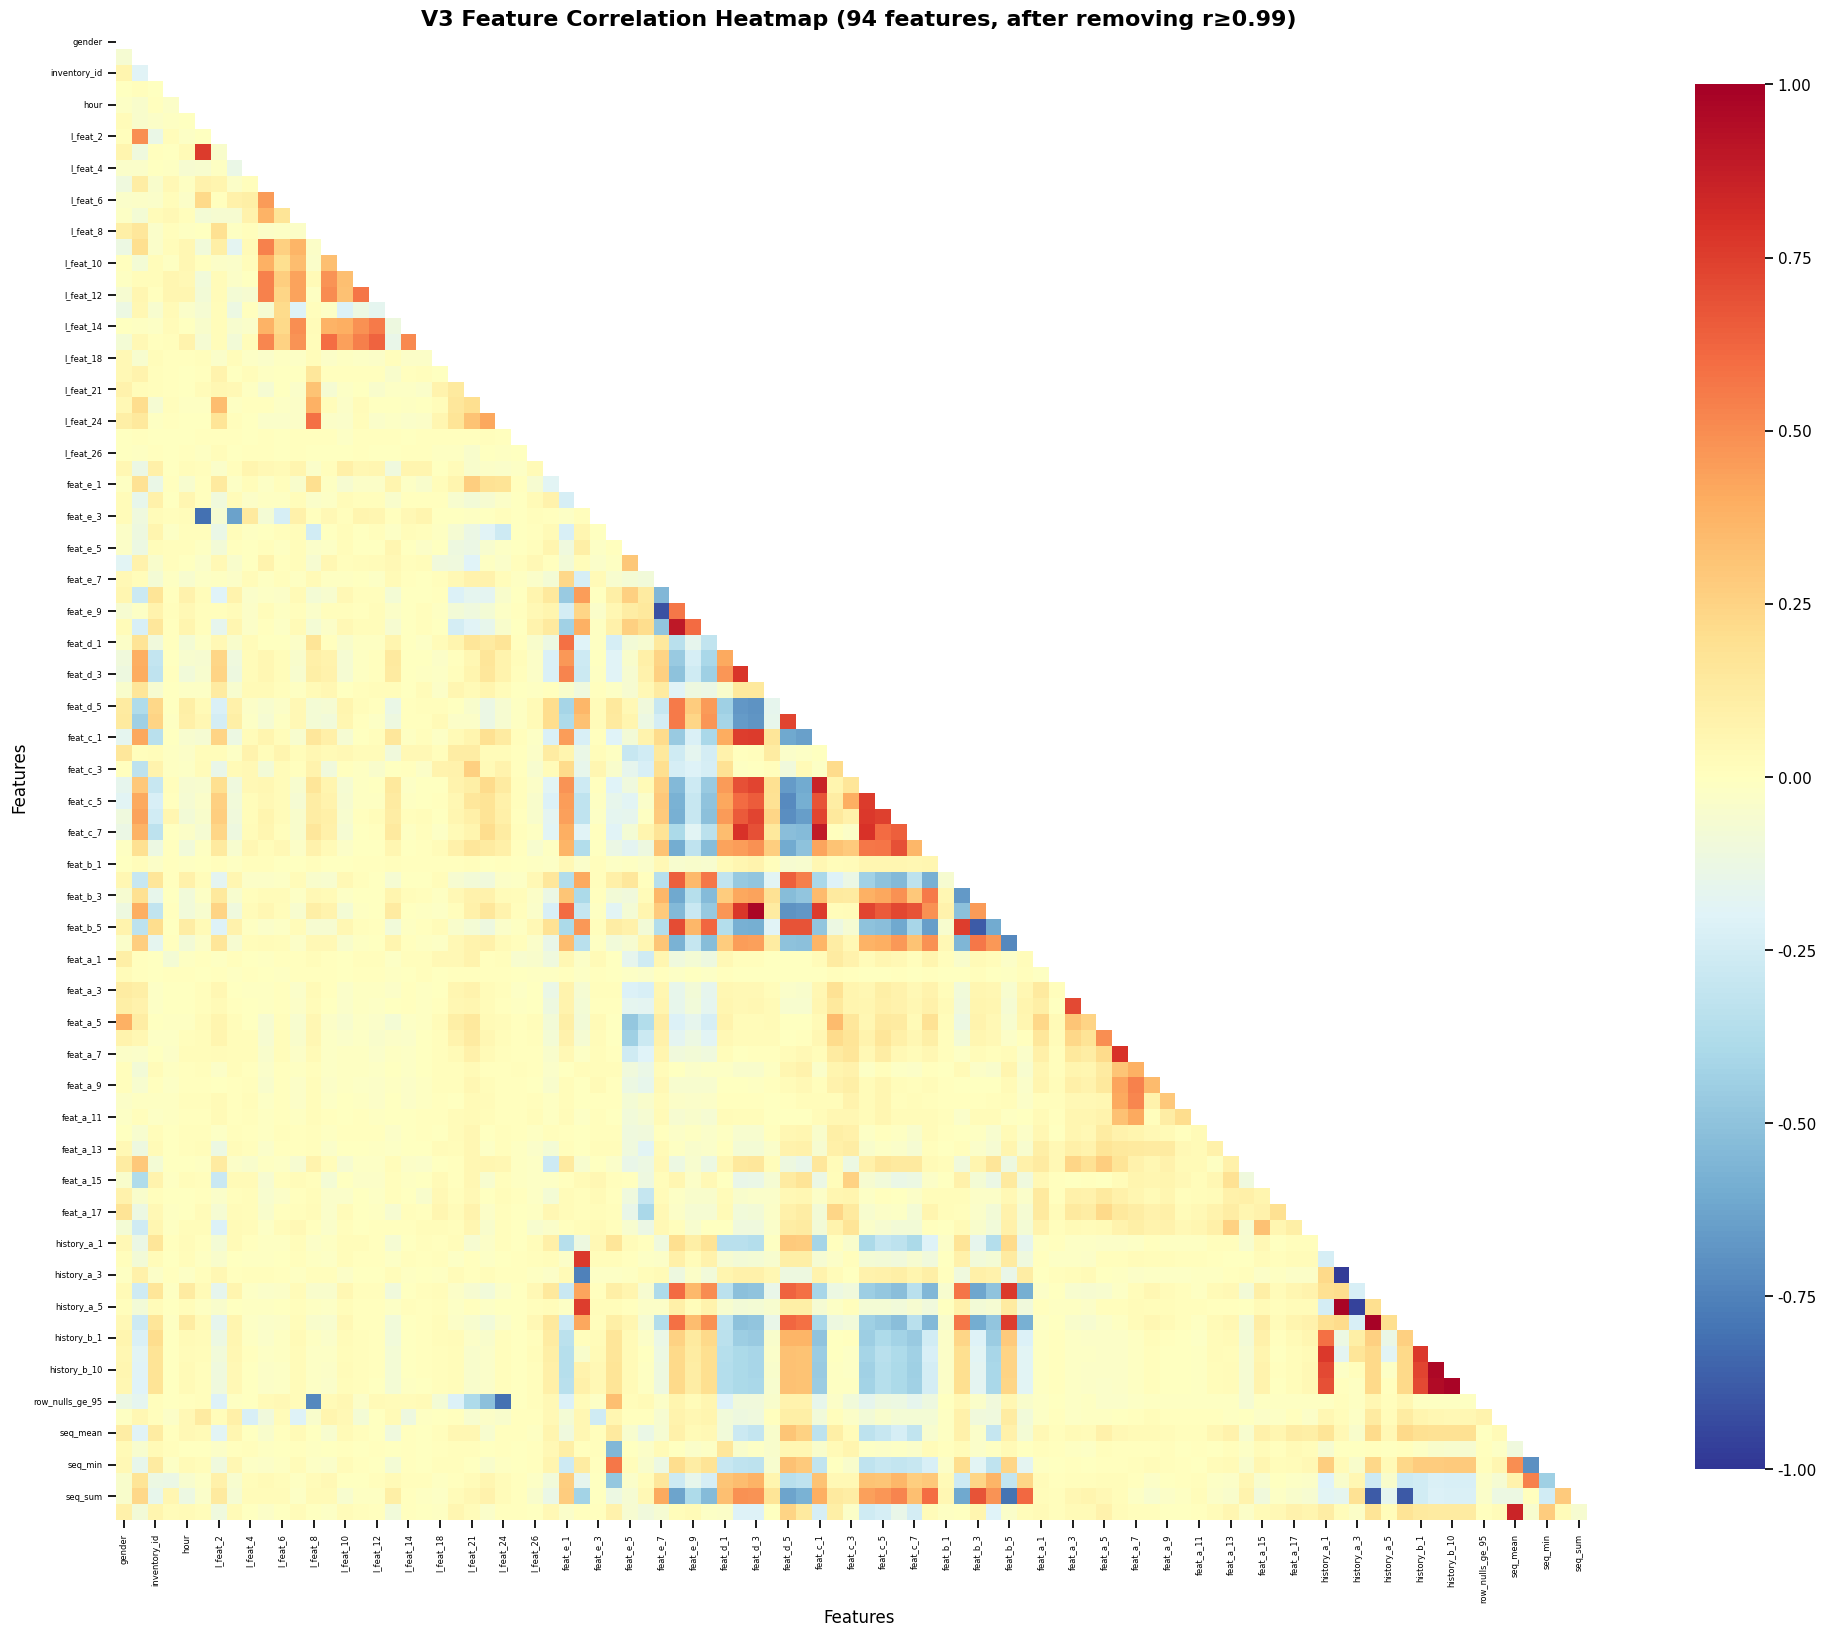

‚úÖ V3 Ï†ÑÏ≤¥ ÌûàÌä∏Îßµ ÏôÑÎ£å

üìä ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌîºÏ≤òÎì§Îßå ÌûàÌä∏Îßµ ÏÉùÏÑ±
ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í¥ÄÎ†® ÌîºÏ≤ò: 28Í∞ú


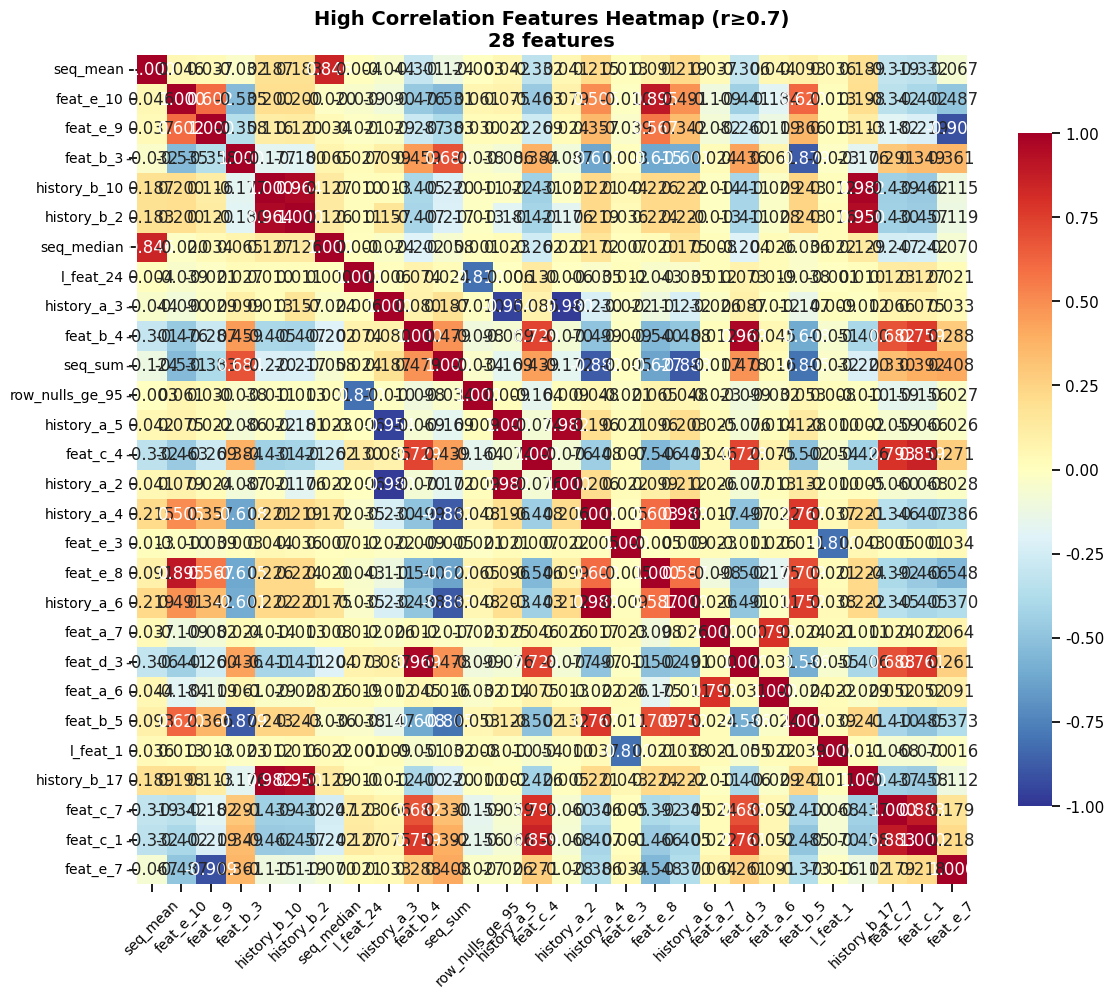

‚úÖ ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ ÏôÑÎ£å

üìã ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌîºÏ≤òÎì§Ïùò Í∑∏Î£π Î∂ÑÎ•ò:
  seq: 3Í∞ú - ['seq_mean', 'seq_median', 'seq_sum']
  feat: 14Í∞ú - ['feat_e_10', 'feat_e_9', 'feat_b_3', 'feat_b_4', 'feat_c_4', 'feat_e_3', 'feat_e_8', 'feat_a_7', 'feat_d_3', 'feat_a_6', 'feat_b_5', 'feat_c_7', 'feat_c_1', 'feat_e_7']
  history_b: 3Í∞ú - ['history_b_10', 'history_b_2', 'history_b_17']
  l_feat: 2Í∞ú - ['l_feat_24', 'l_feat_1']
  history_a: 5Í∞ú - ['history_a_3', 'history_a_5', 'history_a_2', 'history_a_4', 'history_a_6']
  others: 1Í∞ú - ['row_nulls_ge_95']

üéØ V3 ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÏöîÏïΩ:
  Ï†ÑÏ≤¥ ÌîºÏ≤ò: 94Í∞ú
  ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ïåç: 54Í∞ú (r‚â•0.7)
  ÏôÑÏ†Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ïåç: 0Í∞ú (r‚â•0.99)
  ÏµúÎåÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ: 0.9886
  Ï§ëÏúÑÏàò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ: 0.0378


In [19]:
# V3 ÏÉÅÌÉú ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ ÏÉùÏÑ±
import matplotlib.pyplot as plt
import seaborn as sns

print("üìä V3 ÏÉÅÌÉú ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ ÏÉùÏÑ±")
print("=" * 50)

# Ï†ÑÏ≤¥ ÌûàÌä∏Îßµ (ÌÅ¨Í∏∞ Ï°∞Ï†ï)
plt.figure(figsize=(20, 18))
mask = np.triu(np.ones_like(correlation_matrix_v3, dtype=bool))  # ÏÉÅÏÇºÍ∞ÅÌòï ÎßàÏä§ÌÇπ

# ÌûàÌä∏Îßµ ÏÉùÏÑ±
sns.heatmap(correlation_matrix_v3, 
            mask=mask,
            annot=False, 
            cmap='RdYlBu_r',  # Îπ®Í∞ï-ÎÖ∏Îûë-ÌååÎûë ÏÉâÏÉÅÏúºÎ°ú Î≥ÄÍ≤Ω 
            center=0, 
            square=True,
            cbar_kws={"shrink": .8},
            vmin=-1, vmax=1)

plt.title('V3 Feature Correlation Heatmap (94 features, after removing r‚â•0.99)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Ìè∞Ìä∏ ÌÅ¨Í∏∞Î•º Îçî ÏûëÍ≤å Ï°∞Ï†ï
plt.xticks(rotation=90, fontsize=6)
plt.yticks(rotation=0, fontsize=6)
plt.tight_layout()
plt.show()

print("‚úÖ V3 Ï†ÑÏ≤¥ ÌûàÌä∏Îßµ ÏôÑÎ£å")

# ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎßå ÌïÑÌÑ∞ÎßÅÌïú ÌûàÌä∏Îßµ
print("\nüìä ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌîºÏ≤òÎì§Îßå ÌûàÌä∏Îßµ ÏÉùÏÑ±")

# ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÏóê Í¥ÄÎ†®Îêú ÌîºÏ≤òÎì§Îßå Ï∂îÏ∂ú
high_corr_features = set()
for _, row in high_corr_v3.head(20).iterrows():  # ÏÉÅÏúÑ 20Í∞úÎßå
    high_corr_features.add(row['feature1'])
    high_corr_features.add(row['feature2'])

high_corr_features = list(high_corr_features)
print(f"ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í¥ÄÎ†® ÌîºÏ≤ò: {len(high_corr_features)}Í∞ú")

if len(high_corr_features) > 0:
    # Ìï¥Îãπ ÌîºÏ≤òÎì§Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÏÑúÎ∏åÎß§Ìä∏Î¶≠Ïä§ ÏÉùÏÑ±
    high_corr_matrix = correlation_matrix_v3.loc[high_corr_features, high_corr_features]
    
    plt.figure(figsize=(12, 10))
    
    # ÎßàÏä§ÌÇπ ÏóÜÏù¥ Ï†ÑÏ≤¥ Îß§Ìä∏Î¶≠Ïä§ ÌëúÏãú
    sns.heatmap(high_corr_matrix, 
                annot=True, 
                cmap='RdYlBu_r', 
                center=0, 
                square=True,
                cbar_kws={"shrink": .8},
                fmt='.3f',
                vmin=-1, vmax=1)
    
    plt.title(f'High Correlation Features Heatmap (r‚â•0.7)\n{len(high_corr_features)} features', 
              fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.show()
    
    print("‚úÖ ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ ÏôÑÎ£å")
    
    # ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌîºÏ≤òÎì§Ïùò Í∑∏Î£πÎ≥Ñ Î∂ÑÎ•ò
    print(f"\nüìã ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌîºÏ≤òÎì§Ïùò Í∑∏Î£π Î∂ÑÎ•ò:")
    groups_in_high_corr = {}
    for feat in high_corr_features:
        if feat.startswith('history_a_'):
            groups_in_high_corr.setdefault('history_a', []).append(feat)
        elif feat.startswith('history_b_'):
            groups_in_high_corr.setdefault('history_b', []).append(feat)
        elif feat.startswith('feat_'):
            groups_in_high_corr.setdefault('feat', []).append(feat)
        elif feat.startswith('l_feat_'):
            groups_in_high_corr.setdefault('l_feat', []).append(feat)
        elif feat.startswith('seq_'):
            groups_in_high_corr.setdefault('seq', []).append(feat)
        else:
            groups_in_high_corr.setdefault('others', []).append(feat)
    
    for group, features in groups_in_high_corr.items():
        print(f"  {group}: {len(features)}Í∞ú - {features}")

print(f"\nüéØ V3 ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÏöîÏïΩ:")
print(f"  Ï†ÑÏ≤¥ ÌîºÏ≤ò: {correlation_matrix_v3.shape[0]}Í∞ú")
print(f"  ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ïåç: {len(high_corr_v3)}Í∞ú (r‚â•0.7)")
print(f"  ÏôÑÏ†Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ïåç: {len(perfect_corr_v3)}Í∞ú (r‚â•0.99)")
print(f"  ÏµúÎåÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ: {np.max(all_correlations):.4f}")
print(f"  Ï§ëÏúÑÏàò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ: {np.median(all_correlations):.4f}")